<a href="https://colab.research.google.com/github/preetsanjam/Time_Series_Forecasting_Wine_Sales/blob/main/TSF_Rose_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_rose=pd.read_csv('Rose.csv')

In [ ]:
df_rose.head()

,YearMonth,Rose
0,1980-01,112.0
1,1980-02,118.0
2,1980-03,129.0
3,1980-04,99.0
4,1980-05,116.0


In [ ]:
df_rose.tail()

,YearMonth,Rose
182,1995-03,45.0
183,1995-04,52.0
184,1995-05,28.0
185,1995-06,40.0
186,1995-07,62.0


In [ ]:
df_rose.shape

(187, 2)

In [ ]:
df_rose.describe()

,Rose
count,185.000000
mean,90.394595
std,39.175344
min,28.000000
25%,63.000000
50%,86.000000
75%,112.000000
max,267.000000


In [ ]:
df_rose.isnull().sum()

YearMonth    0
Rose         2
dtype: int64

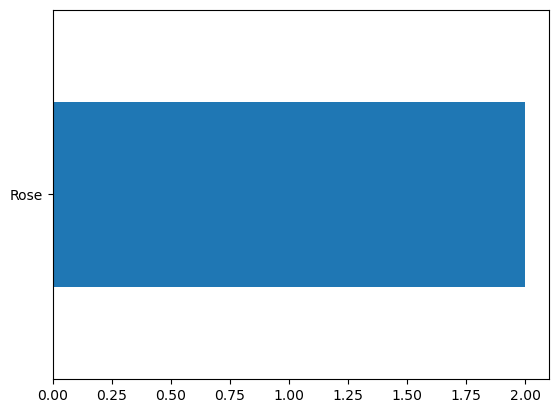

In [ ]:
df_rose.isnull().sum()[df_rose.isnull().sum()>0].plot(kind='barh');

In [ ]:
df_rose.isna().sum()

YearMonth    0
Rose         2
dtype: int64

In [ ]:
df_rose.notna().sum()

YearMonth    187
Rose         185
dtype: int64

In [ ]:
df_rose[df_rose['Rose'].isnull()]

,YearMonth,Rose
174,1994-07,NaN
175,1994-08,NaN


# 1. Read the data as an appropriate Time Series data and plot the data.

In [ ]:
date = pd.date_range(start = '1/1/1980', end = '8/1/1995', freq='M')

In [ ]:
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [ ]:
df_rose['Time Stamp'] = pd.DataFrame(date)
df_rose.head()

,YearMonth,Rose,Time Stamp
0,1980-01,112.0,1980-01-31
1,1980-02,118.0,1980-02-29
2,1980-03,129.0,1980-03-31
3,1980-04,99.0,1980-04-30
4,1980-05,116.0,1980-05-31


In [ ]:
df_rose.set_index(keys='Time Stamp',drop=True, inplace=True)
df_rose.head()

,YearMonth,Rose
Time Stamp,,
1980-01-31,1980-01,112.0
1980-02-29,1980-02,118.0
1980-03-31,1980-03,129.0
1980-04-30,1980-04,99.0
1980-05-31,1980-05,116.0


In [ ]:
df_rose.drop(labels='YearMonth', inplace=True, axis=1)
df_rose.head()

,Rose
Time Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


In [ ]:
df_rose.tail()

,Rose
Time Stamp,
1995-03-31,45.0
1995-04-30,52.0
1995-05-31,28.0
1995-06-30,40.0
1995-07-31,62.0


In [ ]:
df_rose.isnull().sum()

Rose    2
dtype: int64

In [ ]:
df_rose.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [ ]:
df_rose[df_rose['Rose'].isnull()]

,Rose
Time Stamp,
1994-07-31,NaN
1994-08-31,NaN


In [ ]:
#Interpolating null values
df_rose_1=df_rose.interpolate(method='spline', order=2)
df_rose_1.tail(15)

,Rose
Time Stamp,
1994-05-31,44.000000
1994-06-30,45.000000
1994-07-31,45.386725
1994-08-31,44.635276
1994-09-30,46.000000
1994-10-31,51.000000
1994-11-30,63.000000
1994-12-31,84.000000
1995-01-31,30.000000


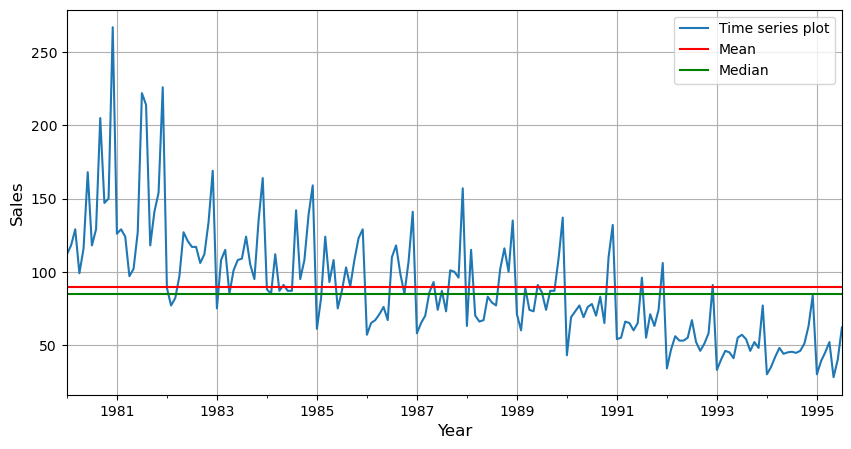

In [ ]:
#Ploting the time series
df_rose_1.plot(figsize=(10,5))
plt.axhline(df_rose_1['Rose'].mean(), color='Red')
plt.axhline(df_rose_1['Rose'].median(), color='Green')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.grid()
plt.legend(['Time series plot', 'Mean', 'Median'])
plt.show();

# 2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

**Yearly boxplot**

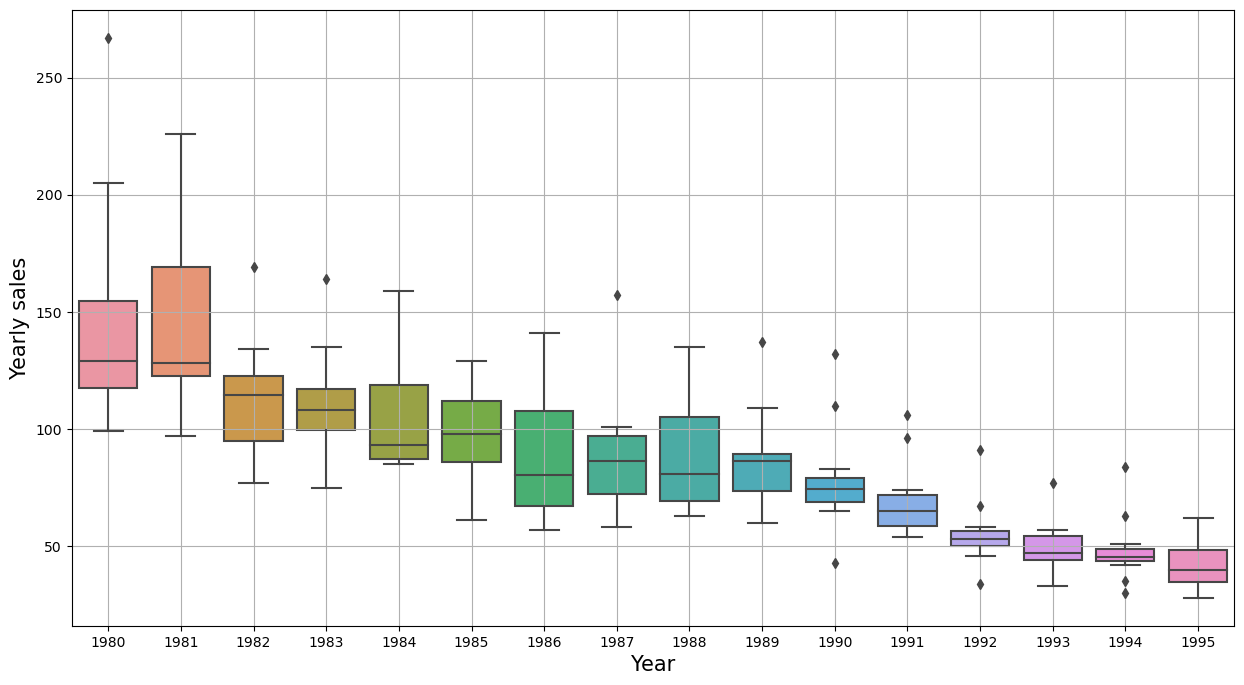

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
sns.boxplot(x=df_rose_1.index.year, y=df_rose_1['Rose'],ax=ax)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Yearly sales', fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid()
plt.show();

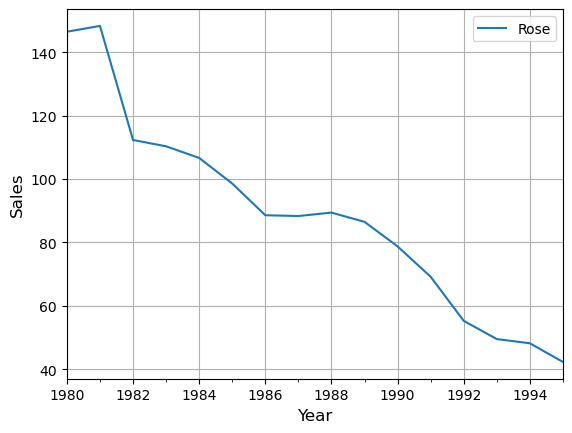

In [ ]:
yearly_sales_mean = df_rose_1.resample('Y').mean()
yearly_sales_mean.plot()
plt.xlabel('Year', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.grid();

**Quaterly boxplot**

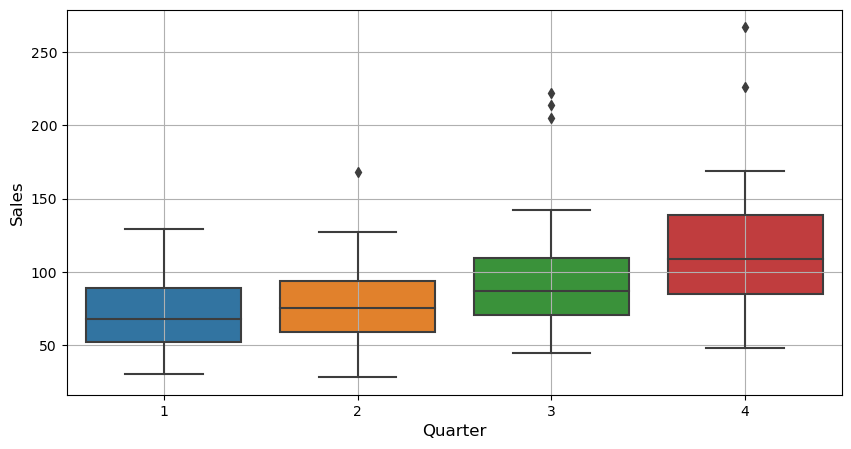

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x=df_rose_1.index.quarter, y=df_rose_1['Rose'],ax=ax)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.grid()
plt.show();

**Monthly boxplot**

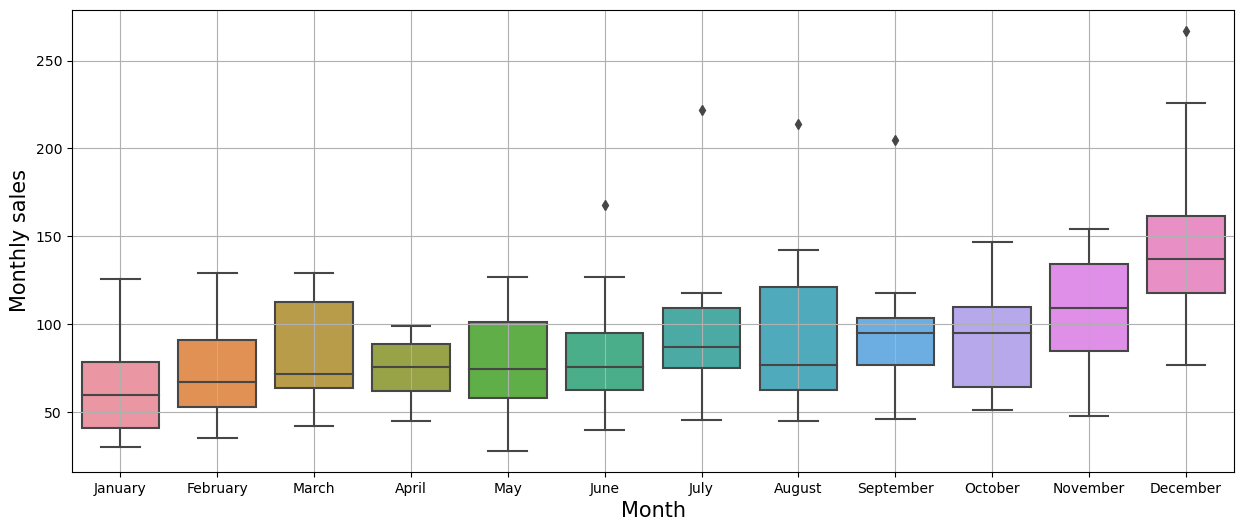

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))
sns.boxplot(x=df_rose_1.index.month_name(), y=df_rose_1['Rose'],ax=ax)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Monthly sales', fontsize=15)
plt.grid()
plt.show();

In [ ]:
from statsmodels.graphics.tsaplots import month_plot

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,5

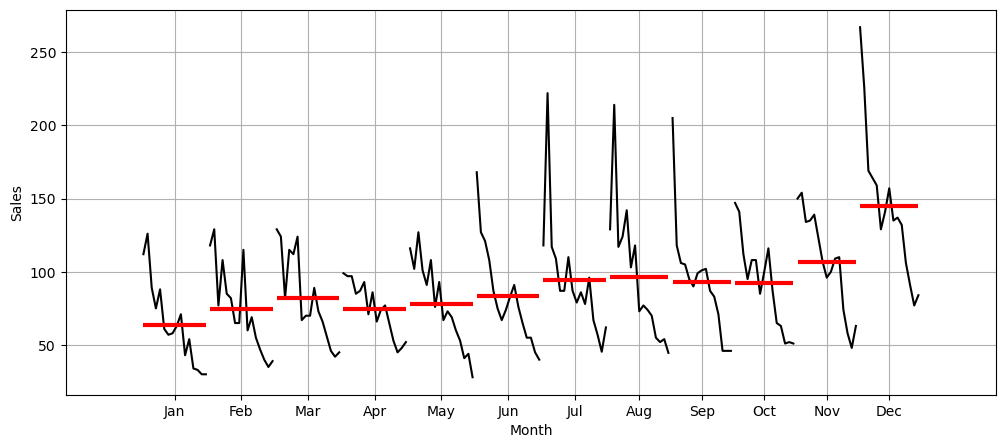

In [ ]:
month_plot(df_rose_1['Rose'], ylabel='Rose');
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid()

In [ ]:
monthly_sales_across_years = pd.pivot_table(df_rose_1, values='Rose', columns=df_rose_1.index.month, index=df_rose_1.index.year)
monthly_sales_across_years

Time Stamp,1,2,3,4,5,6,7,8,9,10,11,12
Time Stamp,,,,,,,,,,,,
1980,112.0,118.0,129.0,99.0,116.0,168.0,118.000000,129.000000,205.0,147.0,150.0,267.0
1981,126.0,129.0,124.0,97.0,102.0,127.0,222.000000,214.000000,118.0,141.0,154.0,226.0
1982,89.0,77.0,82.0,97.0,127.0,121.0,117.000000,117.000000,106.0,112.0,134.0,169.0
1983,75.0,108.0,115.0,85.0,101.0,108.0,109.000000,124.000000,105.0,95.0,135.0,164.0
1984,88.0,85.0,112.0,87.0,91.0,87.0,87.000000,142.000000,95.0,108.0,139.0,159.0
1985,61.0,82.0,124.0,93.0,108.0,75.0,87.000000,103.000000,90.0,108.0,123.0,129.0
1986,57.0,65.0,67.0,71.0,76.0,67.0,110.000000,118.000000,99.0,85.0,107.0,141.0
1987,58.0,65.0,70.0,86.0,93.0,74.0,87.000000,73.000000,101.0,100.0,96.0,157.0
1988,63.0,115.0,70.0,66.0,67.0,83.0,79.000000,77.000000,102.0,116.0,100.0,135.0


**Plot of monthly sales across years**

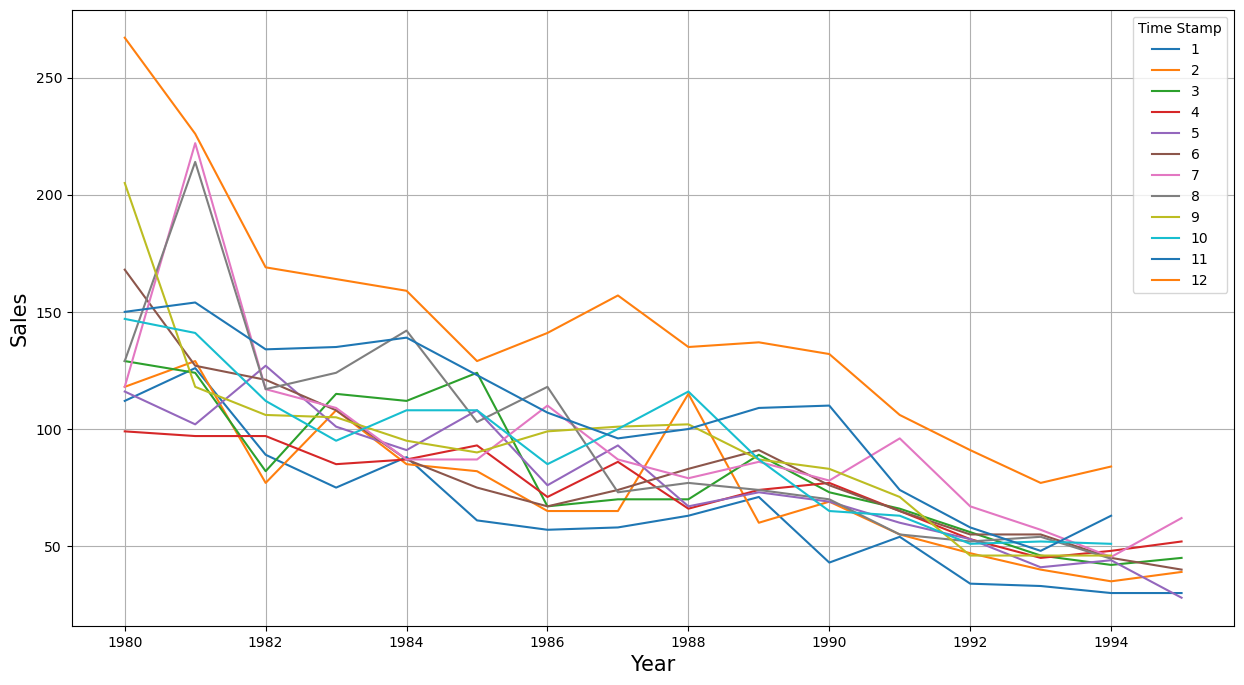

In [ ]:
monthly_sales_across_years.plot(figsize=(15,8))
plt.xlabel('Year', fontsize=15)
plt.ylabel('Sales', fontsize=15)
plt.grid()
plt.show();

**Day-wise sales**

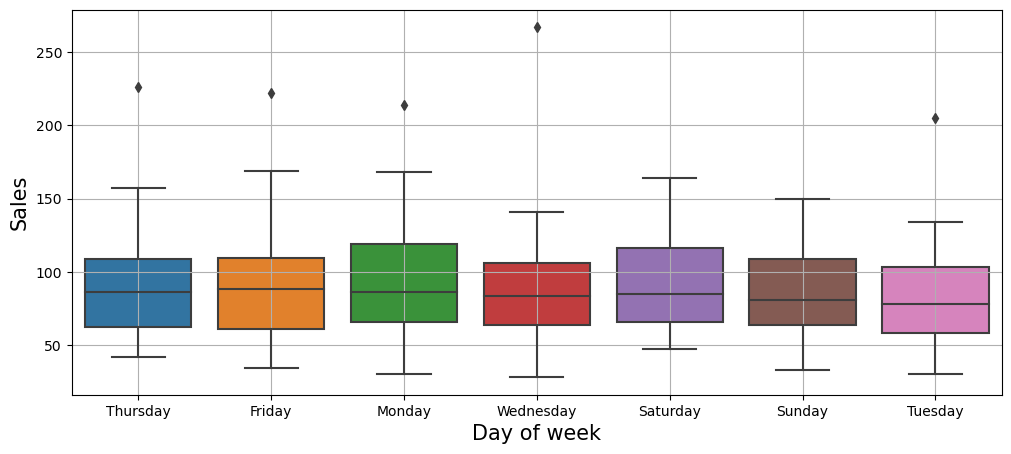

In [ ]:
sns.boxplot(x=df_rose_1.index.day_name(), y=df_rose_1['Rose'])
plt.xlabel('Day of week', fontsize=15)
plt.ylabel('Sales', fontsize=15)
plt.grid()
plt.show();

**Plot the Empirical Cumulative Distribution**

In [ ]:
from statsmodels.distributions.empirical_distribution import ECDF

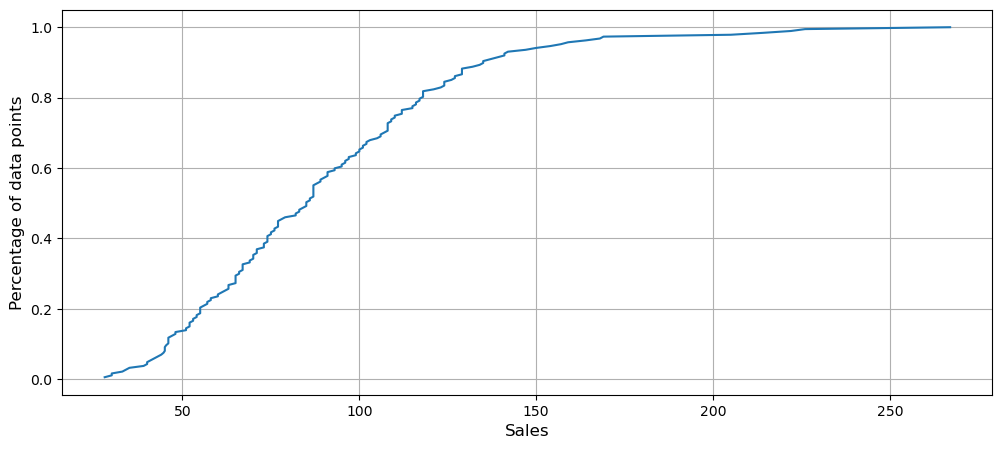

In [ ]:
cdf = ECDF(df_rose_1['Rose'])
plt.plot(cdf.x, cdf.y, label='statsmodels')
plt.xlabel('Sales', fontsize=12)
plt.ylabel('Percentage of data points', fontsize=12)
plt.grid()

**Average sales per month**

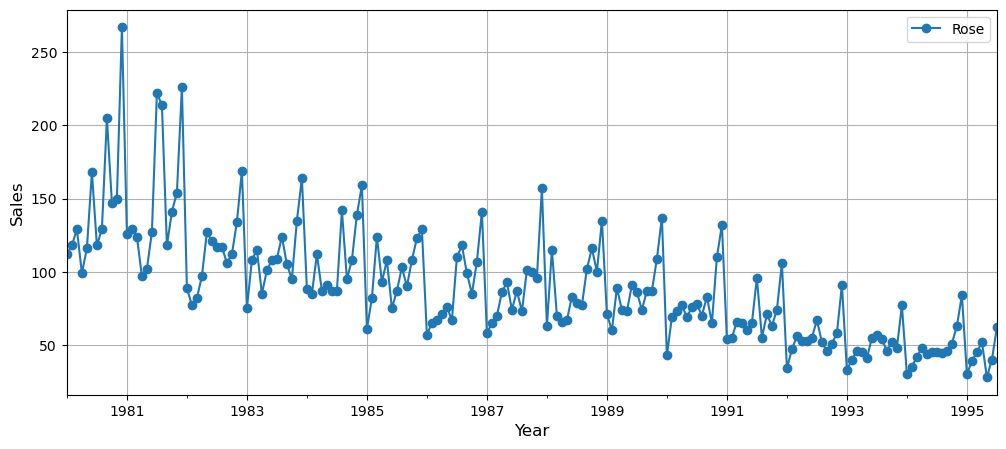

In [ ]:
average = df_rose_1.groupby(df_rose_1.index)['Rose'].mean()
average.plot(legend=True, marker='o', grid=True)
plt.xlabel('Year',fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.show();

**Month-on-month percentage change in sales**

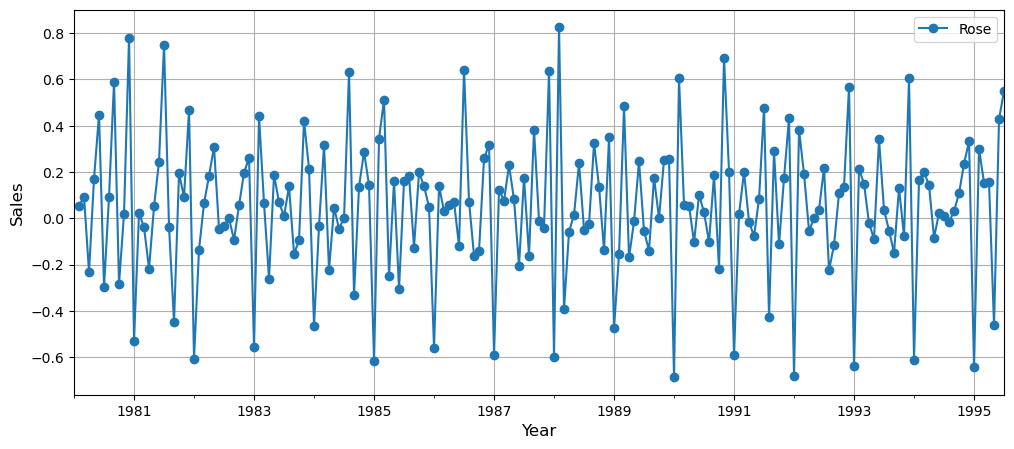

In [ ]:
pct_change = df_rose_1.groupby(df_rose_1.index)['Rose'].sum().pct_change()
pct_change.plot(legend=True,  marker='o', grid=True)
plt.xlabel('Year',fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.show();

**Decompose the series**

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

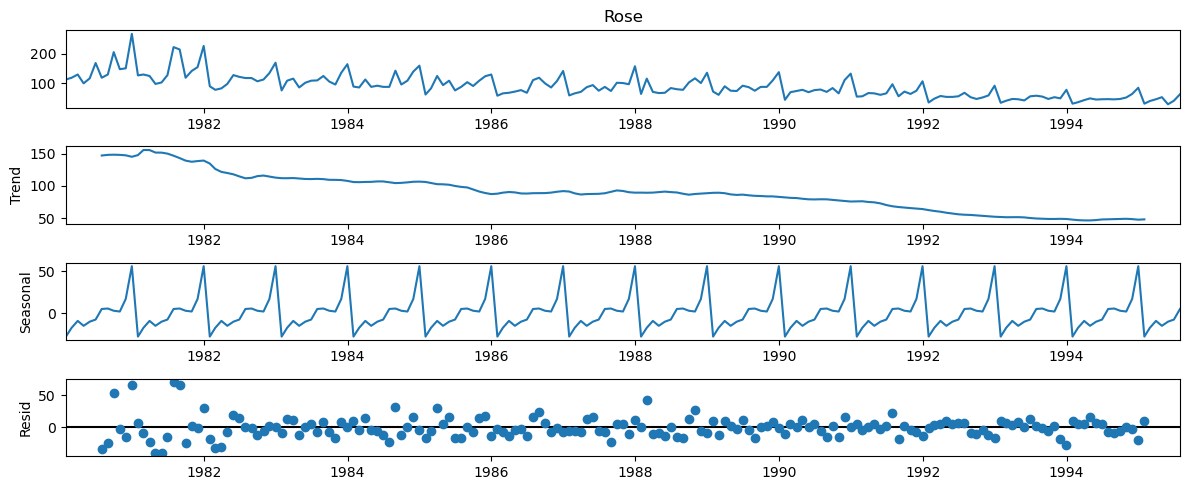

In [ ]:
decomposition = seasonal_decompose(df_rose_1['Rose'], model='additive')
decomposition.plot();

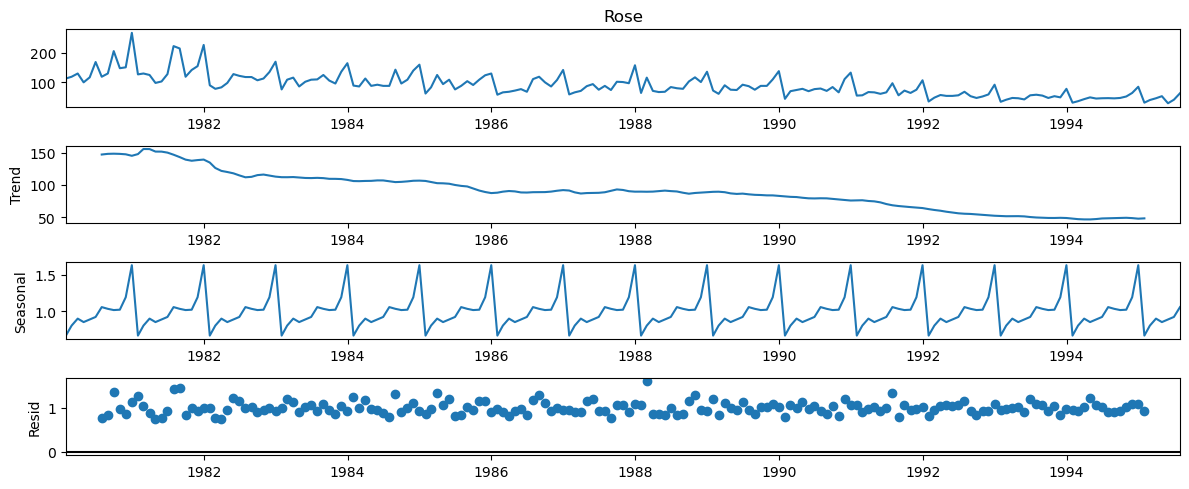

In [ ]:
decomposition_mul = seasonal_decompose(df_rose_1['Rose'], model='multiplicative')
decomposition_mul.plot();

# 3. Split the data into training and test. The test data should start in 1991.

In [ ]:
train = df_rose_1[df_rose_1.index.year < 1991]
test = df_rose_1[df_rose_1.index.year >= 1991]

In [ ]:
train.head()

,Rose
Time Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


In [ ]:
train.tail()

,Rose
Time Stamp,
1990-08-31,70.0
1990-09-30,83.0
1990-10-31,65.0
1990-11-30,110.0
1990-12-31,132.0


In [ ]:
test.head()

,Rose
Time Stamp,
1991-01-31,54.0
1991-02-28,55.0
1991-03-31,66.0
1991-04-30,65.0
1991-05-31,60.0


In [ ]:
test.tail()

,Rose
Time Stamp,
1995-03-31,45.0
1995-04-30,52.0
1995-05-31,28.0
1995-06-30,40.0
1995-07-31,62.0


In [ ]:
print('Train set', '\n''No. of rows:', train.shape[0], '\n''No. of colums:', train.shape[1])
print('\n')
print('Test set', '\n''No. of rows:', test.shape[0], '\n''No. of columns:', test.shape[1])

Train set 
No. of rows: 132 
No. of colums: 1


Test set 
No. of rows: 55 
No. of columns: 1


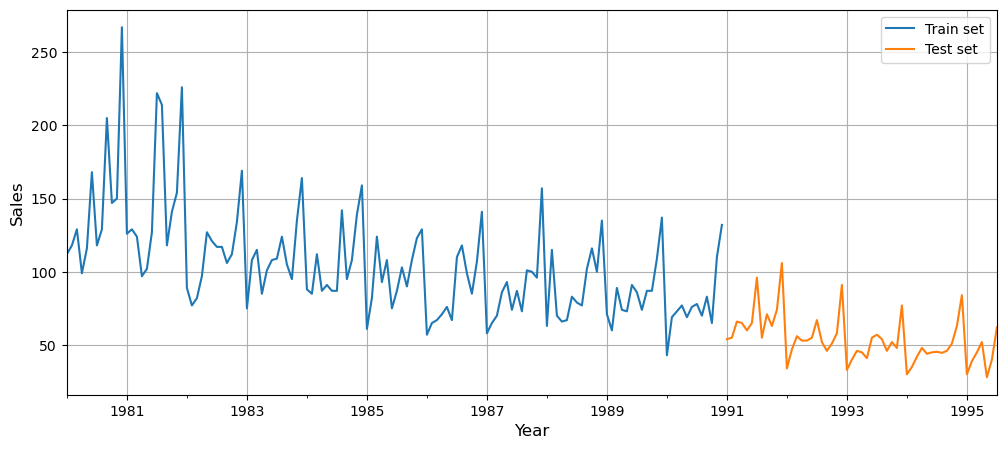

In [ ]:
#Plot train and test time series
train['Rose'].plot()
test['Rose'].plot()
plt.legend(['Train set', 'Test set'])
plt.xlabel('Year', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.grid();

# 4. Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE

# Model 1: Linear Regression

In [ ]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]

In [ ]:
print('Training time instance', '\n', train_time)
print('\n')
print('Test time instance', '\n', test_time)

Training time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]


Test time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [ ]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [ ]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

In [ ]:
print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
              Rose  time
Time Stamp             
1980-01-31  112.0     1
1980-02-29  118.0     2
1980-03-31  129.0     3
1980-04-30   99.0     4
1980-05-31  116.0     5 

Last few rows of Training Data 
              Rose  time
Time Stamp             
1990-08-31   70.0   128
1990-09-30   83.0   129
1990-10-31   65.0   130
1990-11-30  110.0   131
1990-12-31  132.0   132 

First few rows of Test Data 
             Rose  time
Time Stamp            
1991-01-31  54.0   133
1991-02-28  55.0   134
1991-03-31  66.0   135
1991-04-30  65.0   136
1991-05-31  60.0   137 

Last few rows of Test Data 
             Rose  time
Time Stamp            
1995-03-31  45.0   183
1995-04-30  52.0   184
1995-05-31  28.0   185
1995-06-30  40.0   186
1995-07-31  62.0   187 



In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(LinearRegression_train[['time']], LinearRegression_train['Rose'])

LinearRegression()

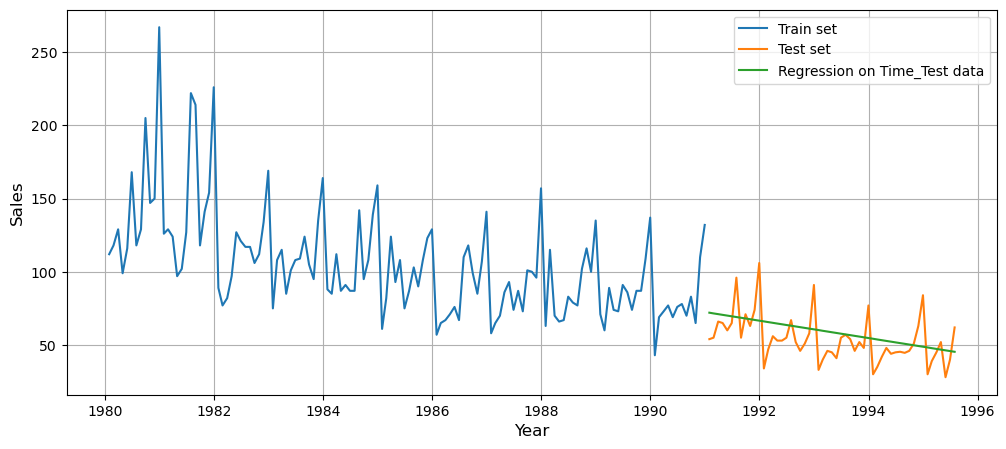

In [ ]:
test_predictions_model1 = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['Reg_on_time'] = test_predictions_model1

plt.plot(train['Rose'], label='Train set')
plt.plot(test['Rose'], label='Test set')
plt.plot(LinearRegression_test['Reg_on_time'], label='Regression on Time_Test data')
plt.legend()
plt.xlabel('Year',fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.grid();

In [ ]:
from sklearn import metrics

In [ ]:
#Model evaluation
rmse_model1_test = metrics.mean_squared_error(test['Rose'], test_predictions_model1, squared=False)
print('For Regression on time forecast, RMSE:', rmse_model1_test)

For Regression on time forecast, RMSE: 15.275520187971763


In [ ]:
results_DF = pd.DataFrame({'Test RMSE': [rmse_model1_test]}, index=['Regression on time'])
results_DF

,Test RMSE
Regression on time,15.27552


# Model 2: Naive Approach

In [ ]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [ ]:
train['Rose'][len(train)-1]

132.0

In [ ]:
NaiveModel_test['Naive'] = train['Rose'][len(train)-1]
NaiveModel_test.head()

,Rose,Naive
Time Stamp,,
1991-01-31,54.0,132.0
1991-02-28,55.0,132.0
1991-03-31,66.0,132.0
1991-04-30,65.0,132.0
1991-05-31,60.0,132.0


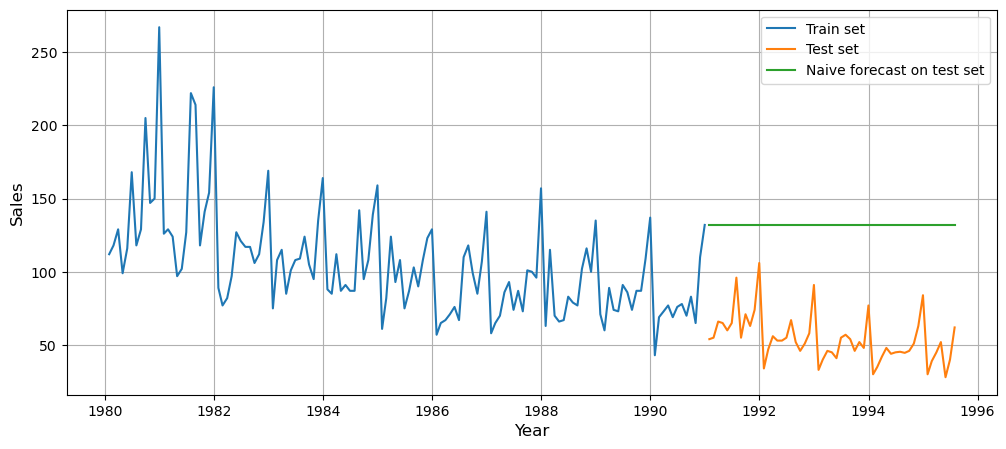

In [ ]:
plt.plot(NaiveModel_train['Rose'], label='Train set')
plt.plot(test['Rose'], label='Test set')
plt.plot(NaiveModel_test['Naive'], label='Naive forecast on test set')
plt.legend()
plt.xlabel('Year', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.grid();

In [ ]:
#Model evaluation
rmse_model2_test = metrics.mean_squared_error(test['Rose'], NaiveModel_test['Naive'], squared=False)
print('For Regression-on-time forecast on Test set, RMSE:', rmse_model2_test)

For Regression-on-time forecast on Test set, RMSE: 79.73814580673158


In [ ]:
results_DF2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]}, index=['Naive Model'])

results_DF = pd.concat([results_DF, results_DF2])
results_DF

,Test RMSE
Regression on time,15.275520
Naive Model,79.738146


# Model 3: Simple Average

In [ ]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [ ]:
train["Rose"].mean()

104.93939393939394

In [ ]:
SimpleAverage_test['Mean Forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

,Rose,Mean Forecast
Time Stamp,,
1991-01-31,54.0,104.939394
1991-02-28,55.0,104.939394
1991-03-31,66.0,104.939394
1991-04-30,65.0,104.939394
1991-05-31,60.0,104.939394


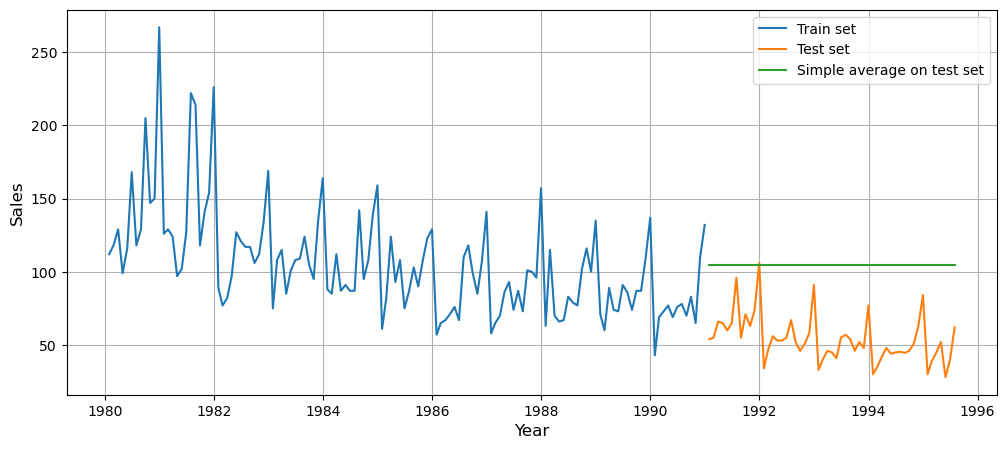

In [ ]:
plt.plot(SimpleAverage_train['Rose'], label='Train set')
plt.plot(SimpleAverage_test['Rose'], label='Test set')
plt.plot(SimpleAverage_test['Mean Forecast'], label='Simple average on test set')
plt.xlabel('Year',fontsize=12)
plt.ylabel('Sales',fontsize=12)
plt.legend()
plt.grid()

In [ ]:
#Model evaluation
rmse_model3_test = metrics.mean_squared_error(test['Rose'], SimpleAverage_test['Mean Forecast'], squared=False)
print('For Simple Average forecast on test set, RMSE:', rmse_model3_test)

For Simple Average forecast on test set, RMSE: 53.48045627354162


In [ ]:
results_DF3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['Simple Average Model'])

results_DF = pd.concat([results_DF, results_DF3])
results_DF

,Test RMSE
Regression on time,15.275520
Naive Model,79.738146
Simple Average Model,53.480456


# Model 4: Moving Average

In [ ]:
MovingAverage = df_rose_1.copy()
MovingAverage.head()

,Rose
Time Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


In [ ]:
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

In [ ]:
MovingAverage.head(10)

,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Time Stamp,,,,,
1980-01-31,112.0,NaN,NaN,NaN,NaN
1980-02-29,118.0,115.0,NaN,NaN,NaN
1980-03-31,129.0,123.5,NaN,NaN,NaN
1980-04-30,99.0,114.0,114.50,NaN,NaN
1980-05-31,116.0,107.5,115.50,NaN,NaN
1980-06-30,168.0,142.0,128.00,123.666667,NaN
1980-07-31,118.0,143.0,125.25,124.666667,NaN
1980-08-31,129.0,123.5,132.75,126.500000,NaN
1980-09-30,205.0,167.0,155.00,139.166667,132.666667


In [ ]:
MovingAverage.tail()

,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Time Stamp,,,,,
1995-03-31,45.0,42.0,49.50,52.000000,49.780222
1995-04-30,52.0,48.5,41.50,52.166667,50.515031
1995-05-31,28.0,40.0,41.00,46.333333,48.666667
1995-06-30,40.0,34.0,41.25,39.000000,48.000000
1995-07-31,62.0,51.0,45.50,44.333333,49.222222


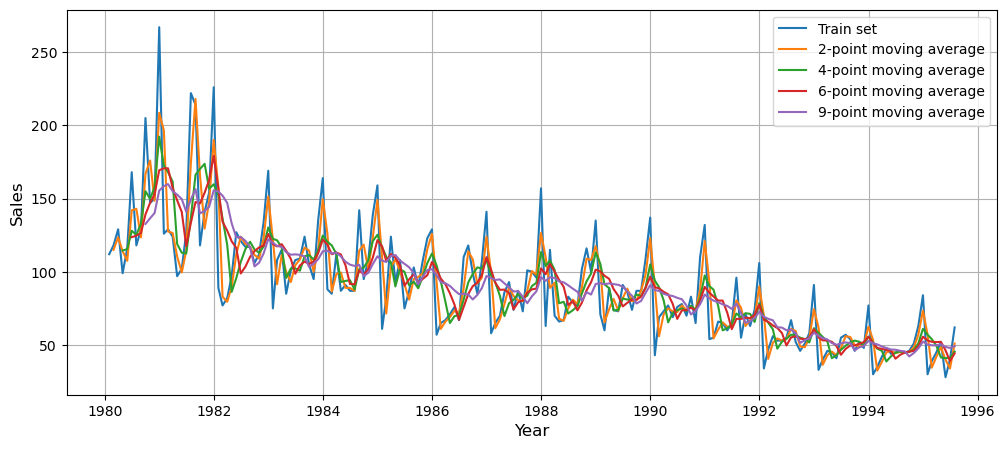

In [ ]:
#Plotting on the whole data

plt.plot(MovingAverage['Rose'], label='Train set')
plt.plot(MovingAverage['Trailing_2'], label='2-point moving average')
plt.plot(MovingAverage['Trailing_4'], label='4-point moving average')
plt.plot(MovingAverage['Trailing_6'], label='6-point moving average')
plt.plot(MovingAverage['Trailing_9'], label='9-point moving average')

plt.xlabel('Year', fontsize=12)
plt.ylabel('Sales', fontsize=12)

plt.legend()
plt.grid();

In [ ]:
#Split the data into train and test sets
trailing_MA_train = MovingAverage[MovingAverage.index < '1991-01-31']
trailing_MA_test = MovingAverage[MovingAverage.index >= '1991-01-31']

In [ ]:
trailing_MA_train.head()

,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Time Stamp,,,,,
1980-01-31,112.0,NaN,NaN,NaN,NaN
1980-02-29,118.0,115.0,NaN,NaN,NaN
1980-03-31,129.0,123.5,NaN,NaN,NaN
1980-04-30,99.0,114.0,114.5,NaN,NaN
1980-05-31,116.0,107.5,115.5,NaN,NaN


In [ ]:
trailing_MA_train.tail()

,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Time Stamp,,,,,
1990-08-31,70.0,74.0,73.25,73.833333,76.888889
1990-09-30,83.0,76.5,76.75,75.500000,70.888889
1990-10-31,65.0,74.0,74.00,73.500000,73.333333
1990-11-30,110.0,87.5,82.00,80.333333,77.888889
1990-12-31,132.0,121.0,97.50,89.666667,84.444444


In [ ]:
trailing_MA_test.shape

(55, 5)

In [ ]:
test.shape

(55, 1)

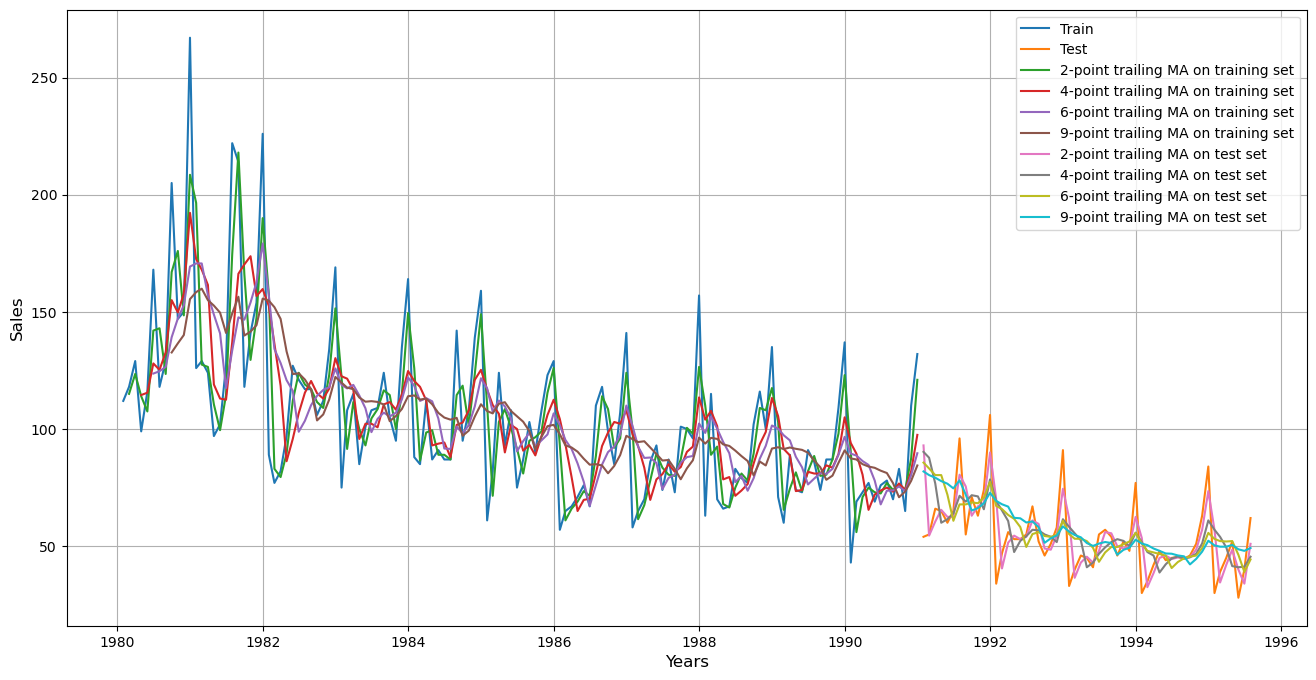

In [ ]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MA_train['Rose'], label='Train')
plt.plot(trailing_MA_test['Rose'], label='Test')

plt.plot(trailing_MA_train['Trailing_2'], label='2-point trailing MA on training set')
plt.plot(trailing_MA_train['Trailing_4'], label='4-point trailing MA on training set')
plt.plot(trailing_MA_train['Trailing_6'], label = '6-point trailing MA on training set')
plt.plot(trailing_MA_train['Trailing_9'], label = '9-point trailing MA on training set')

plt.plot(trailing_MA_test['Trailing_2'], label='2-point trailing MA on test set')
plt.plot(trailing_MA_test['Trailing_4'], label='4-point trailing MA on test set')
plt.plot(trailing_MA_test['Trailing_6'], label = '6-point trailing MA on test set')
plt.plot(trailing_MA_test['Trailing_9'], label = '9-point trailing MA on test set')

plt.xlabel('Years', fontsize=12)
plt.ylabel('Sales', fontsize=12)

plt.legend(loc = 'best')
plt.grid();

In [ ]:
#Trailing MA on training set

trailing_MA_train['Trailing_2'] = trailing_MA_train['Rose'].rolling(2).mean()
trailing_MA_train['Trailing_4'] = trailing_MA_train['Rose'].rolling(4).mean()
trailing_MA_train['Trailing_6'] = trailing_MA_train['Rose'].rolling(6).mean()
trailing_MA_train['Trailing_9'] = trailing_MA_train['Rose'].rolling(9).mean()

In [ ]:
trailing_MA_train.tail()

,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Time Stamp,,,,,
1990-08-31,70.0,74.0,73.25,73.833333,76.888889
1990-09-30,83.0,76.5,76.75,75.500000,70.888889
1990-10-31,65.0,74.0,74.00,73.500000,73.333333
1990-11-30,110.0,87.5,82.00,80.333333,77.888889
1990-12-31,132.0,121.0,97.50,89.666667,84.444444


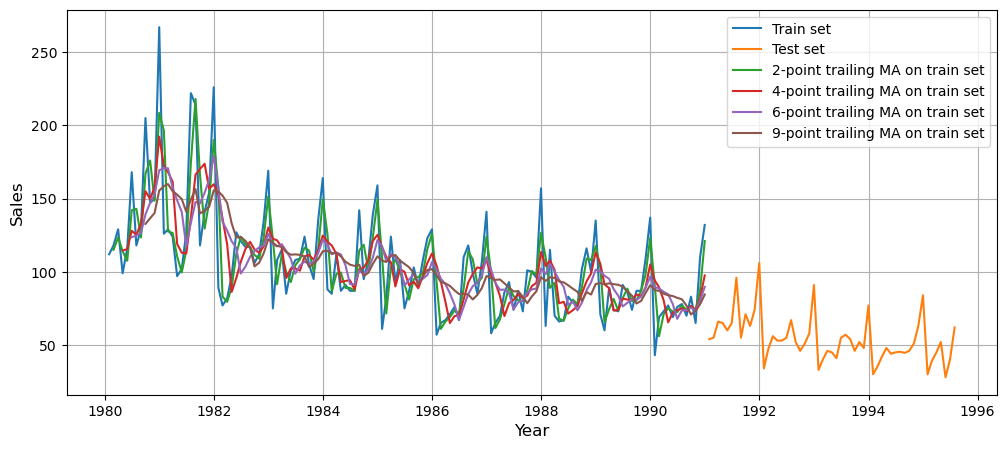

In [ ]:
plt.plot(trailing_MA_train['Rose'], label='Train set')
plt.plot(trailing_MA_test['Rose'], label='Test set')

plt.plot(trailing_MA_train['Trailing_2'], label='2-point trailing MA on train set')
plt.plot(trailing_MA_train['Trailing_4'], label='4-point trailing MA on train set')
plt.plot(trailing_MA_train['Trailing_6'], label='6-point trailing MA on train set')
plt.plot(trailing_MA_train['Trailing_9'], label='9-point trailing MA on train set')

plt.xlabel('Year', fontsize=12)
plt.ylabel('Sales', fontsize=12)

plt.legend()
plt.grid()

In [ ]:
trailing_MA_test['Trailing_2'] = 121.0
trailing_MA_test['Trailing_4'] = 97.50
trailing_MA_test['Trailing_6'] = 89.666667
trailing_MA_test['Trailing_9'] = 84.444444

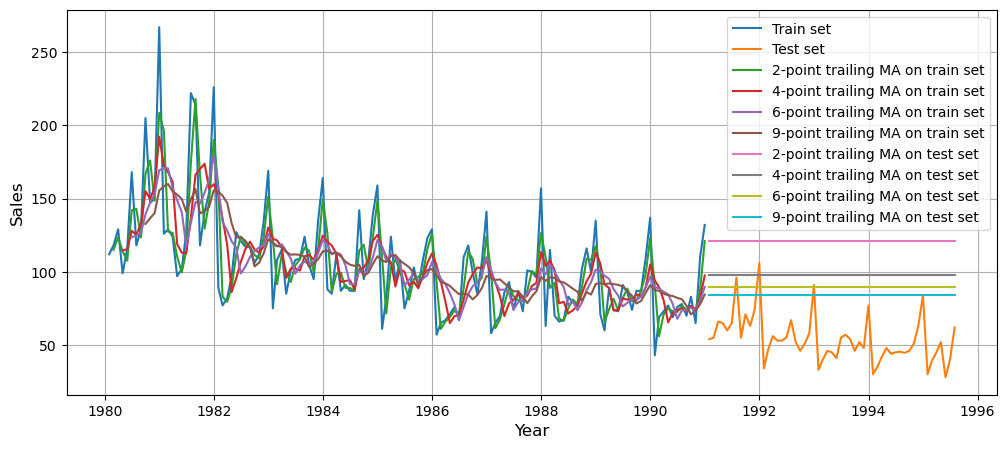

In [ ]:
plt.plot(trailing_MA_train['Rose'], label='Train set')
plt.plot(trailing_MA_test['Rose'], label='Test set')

plt.plot(trailing_MA_train['Trailing_2'], label='2-point trailing MA on train set')
plt.plot(trailing_MA_train['Trailing_4'], label='4-point trailing MA on train set')
plt.plot(trailing_MA_train['Trailing_6'], label='6-point trailing MA on train set')
plt.plot(trailing_MA_train['Trailing_9'], label='9-point trailing MA on train set')

plt.plot(trailing_MA_test['Trailing_2'], label='2-point trailing MA on test set')
plt.plot(trailing_MA_test['Trailing_4'], label='4-point trailing MA on test set')
plt.plot(trailing_MA_test['Trailing_6'], label='6-point trailing MA on test set')
plt.plot(trailing_MA_test['Trailing_9'], label='9-point trailing MA on test set')

plt.xlabel('Year', fontsize=12)
plt.ylabel('Sales', fontsize=12)

plt.legend(loc='best')
plt.grid()

In [ ]:
#RMSE -- 2-point trailing MA
rmse_model4_test_2 = metrics.mean_squared_error(test['Rose'], trailing_MA_test['Trailing_2'], squared=False)
print('For 2-point trailing MA forecast on test set, RMSE is', rmse_model4_test_2)

#RMSE -- 4-point trailing MA
rmse_model4_test_4 = metrics.mean_squared_error(test['Rose'], trailing_MA_test['Trailing_4'], squared=False)
print('For 4-point trailing MA forecast on test set, RMSE is', rmse_model4_test_4)

#RMSE -- 6-point trailing MA
rmse_model4_test_6 = metrics.mean_squared_error(test['Rose'], trailing_MA_test['Trailing_6'], squared=False)
print('For 6-point trailing MA forecast on test set, RMSE is', rmse_model4_test_6)

#RMSE -- 9-point trailing MA
rmse_model4_test_9 = metrics.mean_squared_error(test['Rose'], trailing_MA_test['Trailing_9'], squared=False)
print('For 9-point trailing MA forecast on test set, RMSE is', rmse_model4_test_9)

For 2-point trailing MA forecast on test set, RMSE is 68.98971443119069
For 4-point trailing MA forecast on test set, RMSE is 46.42368565174127
For 6-point trailing MA forecast on test set, RMSE is 39.14667744804001
For 9-point trailing MA forecast on test set, RMSE is 34.431242755693994


In [ ]:
results_DF4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2, rmse_model4_test_4, rmse_model4_test_6, rmse_model4_test_9]},
                          index=['2-point trailing Moving Average',
                                 '4-point trailing Moving Average',
                                 '6-point trailing Moving Average',
                                 '9-point trailing Moving Average'])

results_DF = pd.concat([results_DF, results_DF4])
results_DF

,Test RMSE
Regression on time,15.275520
Naive Model,79.738146
Simple Average Model,53.480456
2-point trailing Moving Average,68.989714
4-point trailing Moving Average,46.423686
6-point trailing Moving Average,39.146677
9-point trailing Moving Average,34.431243


# Model 5: Simple Exponential Smoothing

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [ ]:
SES_train = train.copy()
SES_test = test.copy()

In [ ]:
model_SES= SimpleExpSmoothing(SES_train['Rose'])

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [ ]:
model_SES_autofit = model_SES.fit(optimized=True)

In [ ]:
model_SES.params

{'smoothing_level': 0.09874930910606859,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38712578461187,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [ ]:
SES_test['Predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

,Rose,Predict
Time Stamp,,
1991-01-31,54.0,87.104983
1991-02-28,55.0,87.104983
1991-03-31,66.0,87.104983
1991-04-30,65.0,87.104983
1991-05-31,60.0,87.104983


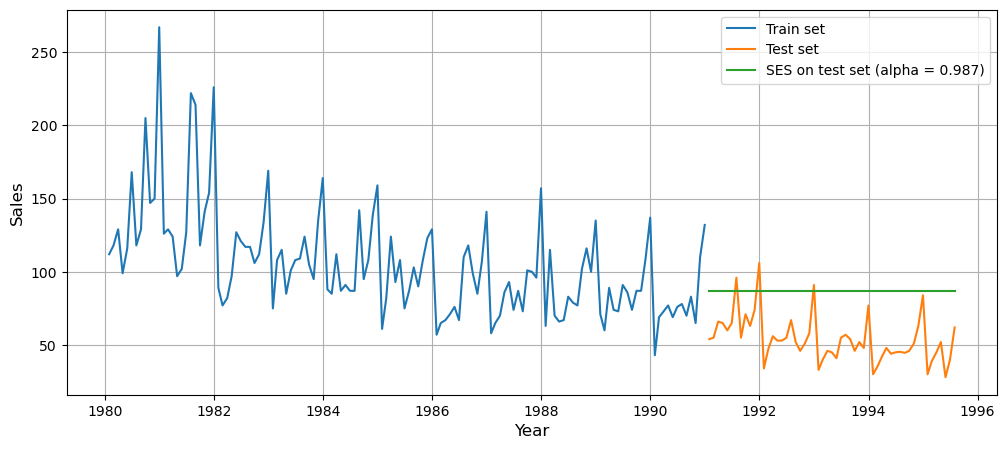

In [ ]:
#Plotting on both test and train sets

plt.plot(SES_train['Rose'], label='Train set')
plt.plot(SES_test['Rose'], label='Test set')

plt.plot(SES_test['Predict'], label="SES on test set (alpha = 0.987)")

plt.xlabel('Year', fontsize=12)
plt.ylabel('Sales', fontsize=12)

plt.legend()
plt.grid();

In [ ]:
#Model evaluation for alpha = 0.987

rmse_model5_test = metrics.mean_squared_error(SES_test['Rose'], SES_test['Predict'], squared=False)
print('For alpha = 0.987, SES forecast on test set, RMSE is', rmse_model5_test)

For alpha = 0.987, SES forecast on test set, RMSE is 36.81650155299817


In [ ]:
results_DF5 = pd.DataFrame({'Test RMSE': [rmse_model5_test]}, index=["Simple Exp Smoothing (alpha = 0.987)"])

results_DF = pd.concat([results_DF, results_DF5])
results_DF

,Test RMSE
Regression on time,15.275520
Naive Model,79.738146
Simple Average Model,53.480456
2-point trailing Moving Average,68.989714
4-point trailing Moving Average,46.423686
6-point trailing Moving Average,39.146677
9-point trailing Moving Average,34.431243
Simple Exp Smoothing (alpha = 0.987),36.816502


#### Setting different alpha values.

###### Remember, the higher the alpha value more weightage is given to the more recent observation. That means, what happened recently will happen again.


#### We will run a loop with different alpha values to understand which particular value works best for alpha on the test set.

In [ ]:
## First we will define an empty dataframe to store our values from the loop

results_SES = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
results_SES

,Alpha Values,Train RMSE,Test RMSE


In [ ]:
for i in np.arange(0.3,1,0.1):
    print(i)

0.3
0.4
0.5
0.6000000000000001
0.7000000000000002
0.8000000000000003
0.9000000000000001


In [ ]:
for i in np.arange(0.3,1,0.1):
    print(round(i,2))

0.3
0.4
0.5
0.6
0.7
0.8
0.9


In [ ]:
for i in np.arange(0.3,1,0.1): # range - 0.3,0.4,0.5...0.9
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['Predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['Predict',i] = model_SES_alpha_i.forecast(steps=len(test))

    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Rose'],SES_train['Predict',i],squared=False)

    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Rose'],SES_test['Predict',i],squared=False)

    results_SES = results_SES.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i
                                      ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)

In [ ]:
results_SES

,Alpha Values,Train RMSE,Test RMSE
0,0.3,32.470164,47.524854
1,0.4,33.035130,53.787285
2,0.5,33.682839,59.661530
3,0.6,34.441171,64.990921
4,0.7,35.323261,69.717704
5,0.8,36.334596,73.793462
6,0.9,37.482782,77.158689


In [ ]:
results_SES.sort_values(by=['Test RMSE'], ascending=True)

,Alpha Values,Train RMSE,Test RMSE
0,0.3,32.470164,47.524854
1,0.4,33.035130,53.787285
2,0.5,33.682839,59.661530
3,0.6,34.441171,64.990921
4,0.7,35.323261,69.717704
5,0.8,36.334596,73.793462
6,0.9,37.482782,77.158689


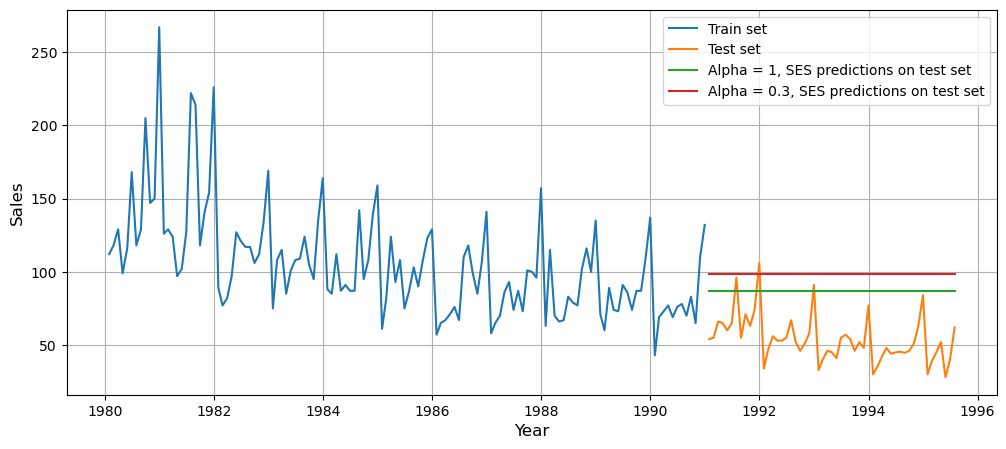

In [ ]:
#PLotting on both test and train sets

plt.plot(SES_train['Rose'], label='Train set')
plt.plot(SES_test['Rose'], label='Test set')

plt.plot(SES_test['Predict'], label='Alpha = 1, SES predictions on test set')
plt.plot(SES_test['Predict', 0.3], label='Alpha = 0.3, SES predictions on test set')

plt.xlabel('Year', fontsize=12)
plt.ylabel('Sales', fontsize=12)

plt.legend()
plt.grid();

In [ ]:
resultsDf_5_1 = pd.DataFrame({'Test RMSE': [results_SES.sort_values(by=['Test RMSE'], ascending=True).values[0][2]]}
                             ,index=["Simple Exp Smoothing (alpha = 0.3)"])

results_DF = pd.concat([results_DF, resultsDf_5_1])
results_DF

,Test RMSE
Regression on time,15.275520
Naive Model,79.738146
Simple Average Model,53.480456
2-point trailing Moving Average,68.989714
4-point trailing Moving Average,46.423686
6-point trailing Moving Average,39.146677
9-point trailing Moving Average,34.431243
Simple Exp Smoothing (alpha = 0.987),36.816502
Simple Exp Smoothing (alpha = 0.3),47.524854


# Model 6: Double Exponential Smoothing (Holt's Model)

Two parameters  α  and  β  are estimated in this model. Level and Trend are accounted for in this model.

In [ ]:
DES_train = train.copy()
DES_test = test.copy()

In [ ]:
model_DES = Holt(DES_train['Rose'])

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [ ]:
model_DES_autofit = model_DES.fit(optimized=True, use_brute=True)

In [ ]:
model_DES_autofit.params_formatted

,name,param,optimized
smoothing_level,alpha,1.490120e-08,True
smoothing_trend,beta,1.092380e-20,True
initial_level,l.0,1.378156e+02,True
initial_trend,b.0,-4.943785e-01,True


In [ ]:
DES_test['Predict'] = model_DES_autofit.forecast(steps=len(test))
DES_test.head()

,Rose,Predict
Time Stamp,,
1991-01-31,54.0,72.063238
1991-02-28,55.0,71.568860
1991-03-31,66.0,71.074481
1991-04-30,65.0,70.580103
1991-05-31,60.0,70.085724


In [ ]:
DES_test.head()

,Rose,Predict
Time Stamp,,
1991-01-31,54.0,72.063238
1991-02-28,55.0,71.568860
1991-03-31,66.0,71.074481
1991-04-30,65.0,70.580103
1991-05-31,60.0,70.085724


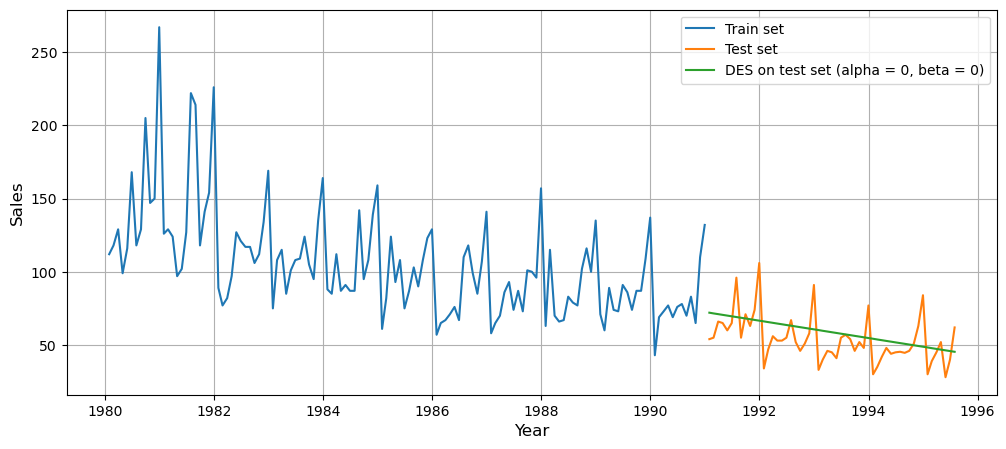

In [ ]:
#Plotting on both test and train sets

plt.plot(DES_train['Rose'], label='Train set')
plt.plot(DES_test['Rose'], label='Test set')

plt.plot(DES_test['Predict'], label="DES on test set (alpha = 0, beta = 0)")

plt.xlabel('Year', fontsize=12)
plt.ylabel('Sales', fontsize=12)

plt.legend()
plt.grid();

In [ ]:
#Model evaluation for alpha = 0, beta = 0

rmse_model6_test = metrics.mean_squared_error(DES_test['Rose'], DES_test['Predict'], squared=False)
print('For alpha = 0, beta = 0, DES forecast on test set, RMSE is', rmse_model6_test)

For alpha = 0, beta = 0, DES forecast on test set, RMSE is 15.275506585263393


In [ ]:
results_DF6 = pd.DataFrame({'Test RMSE':[rmse_model6_test]}, index=["Double Exp Smoothing (alpha = 0, beta = 0)"])

results_DF = pd.concat([results_DF, results_DF6])
results_DF

,Test RMSE
Regression on time,15.275520
Naive Model,79.738146
Simple Average Model,53.480456
2-point trailing Moving Average,68.989714
4-point trailing Moving Average,46.423686
6-point trailing Moving Average,39.146677
9-point trailing Moving Average,34.431243
Simple Exp Smoothing (alpha = 0.987),36.816502
Simple Exp Smoothing (alpha = 0.3),47.524854
"Double Exp Smoothing (alpha = 0, beta = 0)",15.275507


**Setting different alpha and beta values**

In [ ]:
results_DES = pd.DataFrame({'Alpha values': [], 'Beta values': [], 'Train RMSE':[], 'Test RMSE':[]})
results_DES

,Alpha values,Beta values,Train RMSE,Test RMSE


In [ ]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train['Predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['Predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(test))

        rmse_model6_train_1 = metrics.mean_squared_error(DES_train['Rose'],DES_train['Predict',i,j],squared=False)

        rmse_model6_test_1 = metrics.mean_squared_error(DES_test['Rose'],DES_test['Predict',i,j],squared=False)

        results_DES = results_DES.append({'Alpha values':i,'Beta values':j,'Train RMSE':rmse_model6_train_1
                                          ,'Test RMSE':rmse_model6_test_1}, ignore_index=True)

In [ ]:
results_DES

,Alpha values,Beta values,Train RMSE,Test RMSE
0,0.1,0.1,34.439111,36.944359
1,0.1,0.2,33.450729,48.711313
2,0.1,0.3,33.145789,78.180275
3,0.1,0.4,33.262191,99.607370
4,0.1,0.5,33.688415,124.293797
...,...,...,...,...
95,1.0,0.6,51.831610,801.704298
96,1.0,0.7,54.497039,841.916667
97,1.0,0.8,57.365879,853.989634
98,1.0,0.9,60.474309,834.735027


In [ ]:
results_DES.sort_values(by=['Test RMSE']).head()

,Alpha values,Beta values,Train RMSE,Test RMSE
0,0.1,0.1,34.439111,36.944359
1,0.1,0.2,33.450729,48.711313
10,0.2,0.1,33.097427,65.754361
2,0.1,0.3,33.145789,78.180275
20,0.3,0.1,33.611269,98.676364


In [ ]:
DES_test.head()

,Rose,Predict,"(Predict, 0.1, 0.1)","(Predict, 0.1, 0.2)","(Predict, 0.1, 0.30000000000000004)","(Predict, 0.1, 0.4)","(Predict, 0.1, 0.5)","(Predict, 0.1, 0.6)","(Predict, 0.1, 0.7000000000000001)","(Predict, 0.1, 0.8)",...,"(Predict, 1.0, 0.1)","(Predict, 1.0, 0.2)","(Predict, 1.0, 0.30000000000000004)","(Predict, 1.0, 0.4)","(Predict, 1.0, 0.5)","(Predict, 1.0, 0.6)","(Predict, 1.0, 0.7000000000000001)","(Predict, 1.0, 0.8)","(Predict, 1.0, 0.9)","(Predict, 1.0, 1.0)"
Time Stamp,,,,,,,,,,,,,,,,,,,,,
1991-01-31,54.0,72.063238,83.866218,81.272870,82.259346,82.476267,82.238451,82.424266,83.741435,84.760120,...,136.984430,141.975918,146.284705,149.826392,152.623530,154.671795,155.922332,156.297759,155.699004,154.0
1991-02-28,55.0,71.568860,83.977090,81.875325,83.810183,84.717867,85.284392,86.527792,88.982372,90.891769,...,141.968861,151.951835,160.569410,167.652783,173.247060,177.343590,179.844664,180.595518,179.398007,176.0
1991-03-31,66.0,71.074481,84.087961,82.477781,85.361020,86.959467,88.330333,90.631319,94.223309,97.023418,...,146.953291,161.927753,174.854115,185.479175,193.870590,200.015385,203.766996,204.893277,203.097011,198.0
1991-04-30,65.0,70.580103,84.198833,83.080236,86.911857,89.201067,91.376274,94.734845,99.464246,103.155066,...,151.937721,171.903671,189.138820,203.305567,214.494119,222.687180,227.689328,229.191036,226.796014,220.0
1991-05-31,60.0,70.085724,84.309705,83.682691,88.462694,91.442667,94.422215,98.838371,104.705183,109.286715,...,156.922151,181.879588,203.423526,221.131958,235.117649,245.358975,251.611660,253.488795,250.495018,242.0


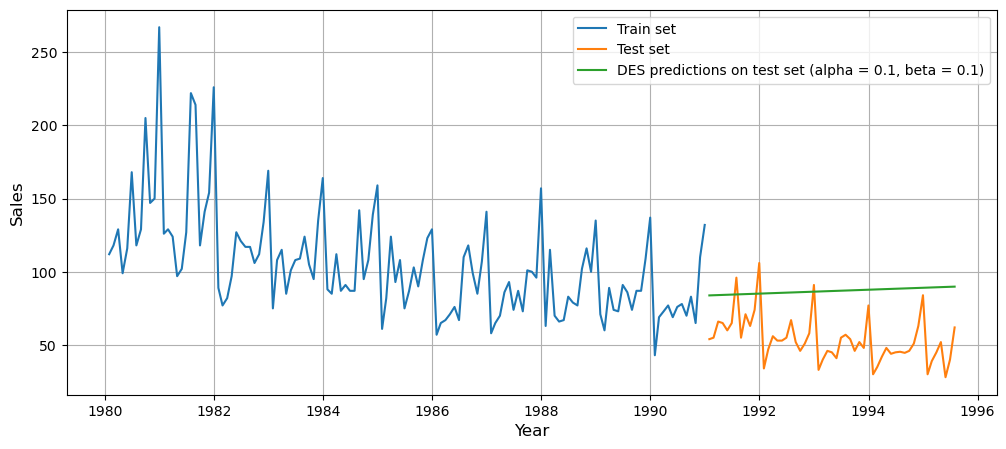

In [ ]:
#PLotting on both train and test sets

plt.plot(DES_train['Rose'],label='Train set')
plt.plot(DES_test['Rose'], label='Test set')

plt.plot(DES_test['Predict', 0.1, 0.1], label="DES predictions on test set (alpha = 0.1, beta = 0.1)")

plt.xlabel('Year', fontsize=12)
plt.ylabel('Sales', fontsize=12)

plt.legend()
plt.grid()

In [ ]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [results_DES.sort_values(by=['Test RMSE']).values[0][3]]}
                            , index=["Double Exp Smoothing (alpha = 0.1, beta = 0.1)"])

results_DF = pd.concat([results_DF, resultsDf_6_1])
results_DF

,Test RMSE
Regression on time,15.275520
Naive Model,79.738146
Simple Average Model,53.480456
2-point trailing Moving Average,68.989714
4-point trailing Moving Average,46.423686
6-point trailing Moving Average,39.146677
9-point trailing Moving Average,34.431243
Simple Exp Smoothing (alpha = 0.987),36.816502
Simple Exp Smoothing (alpha = 0.3),47.524854
"Double Exp Smoothing (alpha = 0, beta = 0)",15.275507


# Model 7: Triple Exponential Smoothing (Holt - Winter's Model)

Three parameters  α ,  β  and  γ  are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

In [ ]:
TES_train = train.copy()
TES_test = test.copy()

In [ ]:
model_1_TES = ExponentialSmoothing(TES_train['Rose'], trend = 'additive', seasonal = 'multiplicative')

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [ ]:
model_1_TES_autofit = model_1_TES.fit()

In [ ]:
model_1_TES_autofit.params_formatted

,name,param,optimized
smoothing_level,alpha,6.621893e-02,True
smoothing_trend,beta,5.130242e-02,True
smoothing_seasonal,gamma,2.673291e-07,True
initial_level,l.0,1.263972e+02,True
initial_trend,b.0,-7.794874e-01,True
initial_seasons.0,s.0,8.917753e-01,True
initial_seasons.1,s.1,1.011599e+00,True
initial_seasons.2,s.2,1.105450e+00,True
initial_seasons.3,s.3,9.661434e-01,True
initial_seasons.4,s.4,1.086238e+00,True


In [ ]:
TES_test['Auto predict'] = model_1_TES_autofit.forecast(steps=len(test))
TES_test.head()

,Rose,Auto predict
Time Stamp,,
1991-01-31,54.0,56.665453
1991-02-28,55.0,64.085515
1991-03-31,66.0,69.819256
1991-04-30,65.0,60.835667
1991-05-31,60.0,68.189618


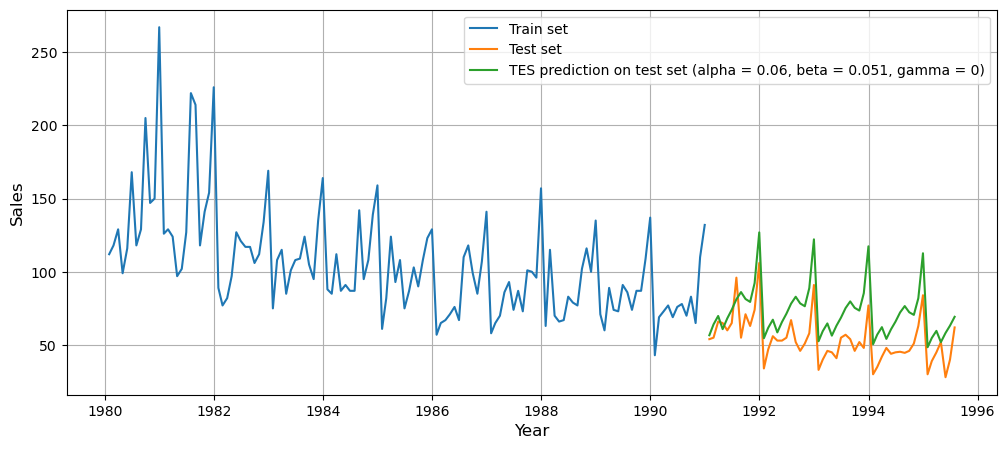

In [ ]:
#Plotting on train and test sets
#alpha = 0.06, beta = 0.051, gamma = 0

plt.plot(TES_train['Rose'], label = 'Train set')
plt.plot(TES_test['Rose'], label = 'Test set')

plt.plot(TES_test['Auto predict'], label = "TES prediction on test set (alpha = 0.06, beta = 0.051, gamma = 0)")

plt.xlabel('Year', fontsize=12)
plt.ylabel('Sales', fontsize=12)

plt.legend()
plt.grid();

In [ ]:
#Model evaluation for alpha = 0.06, beta = 0.051, gamma = 0
rmse_model7_test = metrics.mean_squared_error(TES_test['Rose'], TES_test['Auto predict'], squared=False)
print('For alpha = 0.06, beta = 0.051, gamma = 0, TES forecast on test set, RMSE is', rmse_model7_test)

For alpha = 0.06, beta = 0.051, gamma = 0, TES forecast on test set, RMSE is 20.976544650704717


In [ ]:
results_DF7 = pd.DataFrame({'Test RMSE': [rmse_model7_test]},
                           index = ["Triple Exp Smoothing (alpha = 0.06, beta = 0.051, gamma = 0)"])

results_DF = pd.concat([results_DF, results_DF7])
results_DF

,Test RMSE
Regression on time,15.275520
Naive Model,79.738146
Simple Average Model,53.480456
2-point trailing Moving Average,68.989714
4-point trailing Moving Average,46.423686
6-point trailing Moving Average,39.146677
9-point trailing Moving Average,34.431243
Simple Exp Smoothing (alpha = 0.987),36.816502
Simple Exp Smoothing (alpha = 0.3),47.524854
"Double Exp Smoothing (alpha = 0, beta = 0)",15.275507


**Additive Seasoanlity**

In [ ]:
model_2_TES = ExponentialSmoothing(TES_train['Rose'], trend = 'additive', seasonal = 'additive')

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [ ]:
model_2_TES_autofit = model_2_TES.fit()

In [ ]:
model_2_TES_autofit.params_formatted

,name,param,optimized
smoothing_level,alpha,0.088651,True
smoothing_trend,beta,0.000149,True
smoothing_seasonal,gamma,0.002347,True
initial_level,l.0,146.888777,True
initial_trend,b.0,-0.549569,True
initial_seasons.0,s.0,-31.167128,True
initial_seasons.1,s.1,-18.736040,True
initial_seasons.2,s.2,-10.731822,True
initial_seasons.3,s.3,-21.439591,True
initial_seasons.4,s.4,-12.718800,True


In [ ]:
TES_test['Auto predict'] = model_2_TES_autofit.forecast(steps=len(test))
TES_test.head()

,Rose,Auto predict
Time Stamp,,
1991-01-31,54.0,42.615473
1991-02-28,55.0,54.496368
1991-03-31,66.0,61.950485
1991-04-30,65.0,50.696607
1991-05-31,60.0,58.868607


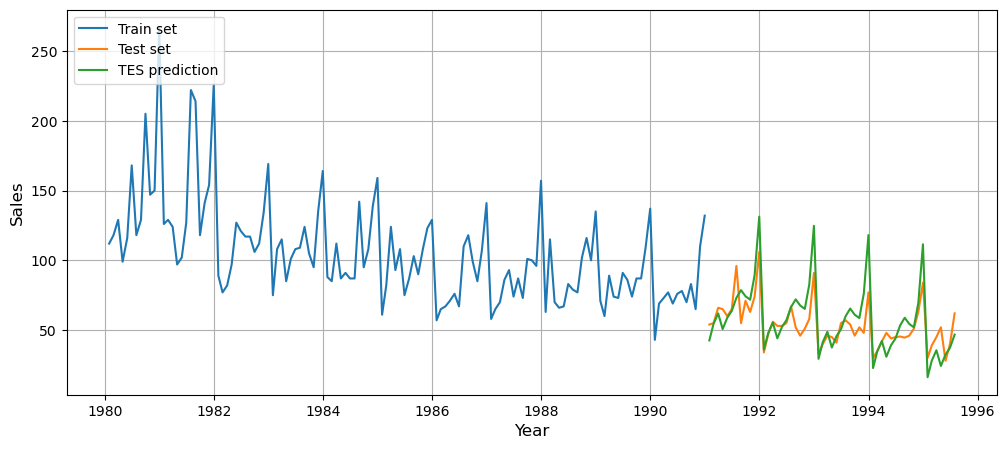

In [ ]:
#Plotting on train and test sets
#alpha = 0.088, beta = 0.0001, gamma = 0.0023

plt.plot(TES_train['Rose'], label = 'Train set')
plt.plot(TES_test['Rose'], label = 'Test set')

plt.plot(TES_test['Auto predict'], label = "TES prediction")

plt.xlabel('Year', fontsize=12)
plt.ylabel('Sales', fontsize=12)

plt.legend(loc='upper left')
plt.grid();

In [ ]:
#Model evaluation for alpha = 0.088, beta = 0.0001, gamma = 0.0023
rmse_model7_test_1 = metrics.mean_squared_error(TES_test['Rose'], TES_test['Auto predict'], squared=False)
print('For alpha = 0.088, beta = 0.0001, gamma = 0.0023, TES forecast on test set, RMSE is', rmse_model7_test_1)

For alpha = 0.088, beta = 0.0001, gamma = 0.0023, TES forecast on test set, RMSE is 14.297932973721158


In [ ]:
results_DF7_1 = pd.DataFrame({'Test RMSE': [rmse_model7_test_1]},
                           index = ["Triple Exp Smoothing (alpha = 0.088, beta = 0.0001, gamma = 0.0023)"])

results_DF = pd.concat([results_DF, results_DF7_1])
results_DF

,Test RMSE
Regression on time,15.275520
Naive Model,79.738146
Simple Average Model,53.480456
2-point trailing Moving Average,68.989714
4-point trailing Moving Average,46.423686
6-point trailing Moving Average,39.146677
9-point trailing Moving Average,34.431243
Simple Exp Smoothing (alpha = 0.987),36.816502
Simple Exp Smoothing (alpha = 0.3),47.524854
"Double Exp Smoothing (alpha = 0, beta = 0)",15.275507


**Setting different values of alpha, beta and gamma**

In [ ]:
results_TES = pd.DataFrame({'Alpha values': [], 'Beta values': [], 'Gamma values': [], 'Train RMSE': [], 'Test RMSE': []})
results_TES

,Alpha values,Beta values,Gamma values,Train RMSE,Test RMSE


In [ ]:
for i in np.arange(0.1, 1, 0.1):
    for i in np.arange(0.1, 1, 0.1):
        for k in np.arange(0.1, 1, 0.1):
            model_TES_alpha_i_j_k = model_2_TES.fit(smoothing_level = i,
                                                  smoothing_trend = j,
                                                  smoothing_seasonal = k,
                                                optimized = False, use_brute = True)
            TES_train['Predict',i, j, k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['Predict', i, j, k] = model_TES_alpha_i_j_k.forecast(steps=len(test))

            rmse_model7_train_2 = metrics.mean_squared_error(TES_train['Rose'], TES_train['Predict', i, j, k], squared = False)
            rmse_model7_test_2 = metrics.mean_squared_error(TES_test['Rose'], TES_test['Predict', i, j, k], squared = False)

            results_TES =results_TES.append({'Alpha values': i,
                                            'Beta values': j,
                                            'Gamma values': k,
                                            'Train RMSE': rmse_model7_train_2,
                                            'Test RMSE': rmse_model7_test_2},
                                            ignore_index = True)

In [ ]:
results_TES

,Alpha values,Beta values,Gamma values,Train RMSE,Test RMSE
0,0.1,1.0,0.1,23.899997,28.708247
1,0.1,1.0,0.2,24.271787,27.612066
2,0.1,1.0,0.3,25.253883,69.954894
3,0.1,1.0,0.4,26.624628,143.739415
4,0.1,1.0,0.5,28.247284,265.016422
...,...,...,...,...,...
1453,0.9,1.0,0.5,164.008717,1299.135442
1454,0.9,1.0,0.6,440.003091,1901.834147
1455,0.9,1.0,0.7,1389.886976,21048.852564
1456,0.9,1.0,0.8,4450.475236,134909.971639


In [ ]:
results_TES.sort_values(by=['Test RMSE']).head()

,Alpha values,Beta values,Gamma values,Train RMSE,Test RMSE
1297,0.1,1.0,0.2,24.271787,27.612066
325,0.1,1.0,0.2,24.271787,27.612066
487,0.1,1.0,0.2,24.271787,27.612066
1054,0.1,1.0,0.2,24.271787,27.612066
649,0.1,1.0,0.2,24.271787,27.612066


In [ ]:
TES_test.head()

,Rose,Auto predict,"(Predict, 0.1, 1.0, 0.1)","(Predict, 0.1, 1.0, 0.2)","(Predict, 0.1, 1.0, 0.30000000000000004)","(Predict, 0.1, 1.0, 0.4)","(Predict, 0.1, 1.0, 0.5)","(Predict, 0.1, 1.0, 0.6)","(Predict, 0.1, 1.0, 0.7000000000000001)","(Predict, 0.1, 1.0, 0.8)",...,"(Predict, 0.8, 1.0, 0.9)","(Predict, 0.9, 1.0, 0.1)","(Predict, 0.9, 1.0, 0.2)","(Predict, 0.9, 1.0, 0.30000000000000004)","(Predict, 0.9, 1.0, 0.4)","(Predict, 0.9, 1.0, 0.5)","(Predict, 0.9, 1.0, 0.6)","(Predict, 0.9, 1.0, 0.7000000000000001)","(Predict, 0.9, 1.0, 0.8)","(Predict, 0.9, 1.0, 0.9)"
Time Stamp,,,,,,,,,,,,,,,,,,,,,
1991-01-31,54.0,42.615473,44.521875,48.662729,53.784074,60.675138,65.840959,67.547383,75.948986,122.431276,...,-1178.842407,39.033637,39.939540,77.324069,201.766473,256.068503,379.293106,2200.692229,9716.516895,28253.623443
1991-02-28,55.0,54.496368,55.326741,64.561807,73.128744,84.620104,96.794287,107.378186,127.838354,200.832794,...,794.165204,13.852494,15.748463,21.114691,236.587418,480.718430,389.644782,1644.605634,12032.869871,48680.806036
1991-03-31,66.0,61.950485,61.437479,70.791167,80.060908,94.811807,113.775041,133.668776,165.987838,262.766396,...,-376.630837,-22.100013,-30.152383,-53.234967,119.752399,506.485027,950.603226,2544.151750,11257.970998,44889.274290
1991-04-30,65.0,50.696607,49.114717,64.031043,77.310674,96.362135,121.904831,150.967138,195.535409,315.925744,...,-6534.418751,-54.740506,-81.033408,-102.723046,61.774433,263.517977,947.034364,5760.499495,23393.423721,63414.814943
1991-05-31,60.0,58.868607,54.608320,66.584192,78.161711,97.340845,126.063035,161.357329,214.863893,352.575859,...,1871.476587,-72.246753,-114.921536,-158.764252,88.149282,182.327608,-243.868586,3636.047434,31186.838607,125601.687464


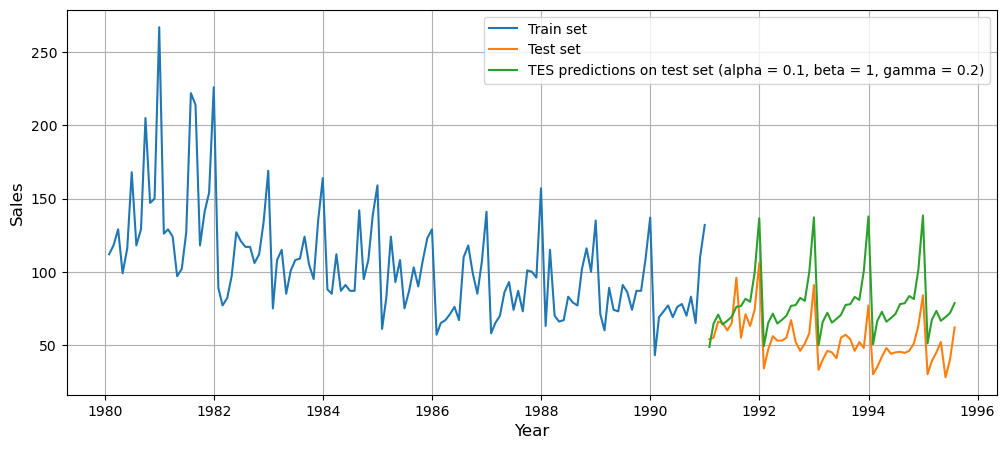

In [ ]:
#Plotting on both training and test sets
plt.plot(TES_train['Rose'], label = 'Train set')
plt.plot(TES_test['Rose'], label = 'Test set')

plt.plot(TES_test['Predict', 0.1, 1.0, 0.2], label = "TES predictions on test set (alpha = 0.1, beta = 1, gamma = 0.2)")

plt.xlabel('Year', fontsize=12)
plt.ylabel('Sales', fontsize=12)

plt.legend()
plt.grid();

In [ ]:
results_DF7_2 =  pd.DataFrame({'Test RMSE': [results_TES.sort_values(by=['Test RMSE']).values[0][4]]},
                           index = ["Triple Exp Smoothing (alpha = 0.1, beta = 1, gamma = 0.2)"])

results_DF = pd.concat([results_DF, results_DF7_2])
results_DF

,Test RMSE
Regression on time,15.275520
Naive Model,79.738146
Simple Average Model,53.480456
2-point trailing Moving Average,68.989714
4-point trailing Moving Average,46.423686
6-point trailing Moving Average,39.146677
9-point trailing Moving Average,34.431243
Simple Exp Smoothing (alpha = 0.987),36.816502
Simple Exp Smoothing (alpha = 0.3),47.524854
"Double Exp Smoothing (alpha = 0, beta = 0)",15.275507


# 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determining rolling statistics
    rolmean = timeseries.rolling(window = 7).mean() #determing rolling mean
    rolstd = timeseries.rolling(window = 7).std() #determing rolling std deviation

    #Plot rolling statistics
    orig = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Rolling mean')
    std = plt.plot(rolstd, color = 'black', label = 'Rolling std')

    plt.xlabel('Year', fontsize = 12)
    plt.ylabel('Sales', fontsize = 12)

    plt.legend()
    plt.grid()
    plt.show(block = False)

    #Perform Dickey_Fuller test
    print('Results of Dickey-Fuller test')
    dftest = adfuller(timeseries, autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical value (%s)'%key] = value
    print(dfoutput, '\n')

In [ ]:
adfuller(train)

(-2.1642495341524737,
 0.21947564129072372,
 13,
 118,
 {'1%': -3.4870216863700767,
  '5%': -2.8863625166643136,
  '10%': -2.580009026141913},
 1087.055055461308)

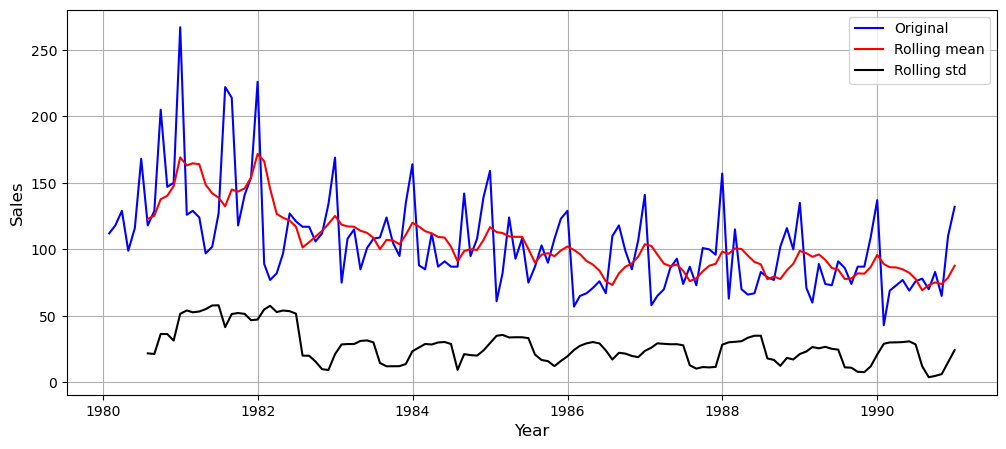

Results of Dickey-Fuller test
Test Statistic                  -2.164250
p-value                          0.219476
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical value (1%)             -3.487022
Critical value (5%)             -2.886363
Critical value (10%)            -2.580009
dtype: float64 



In [ ]:
test_stationarity(train)

**We see that at 5% significant level the Time Series is non-stationary**

**Let us take a difference of order 1 and check whether the Time Series is stationary or not**

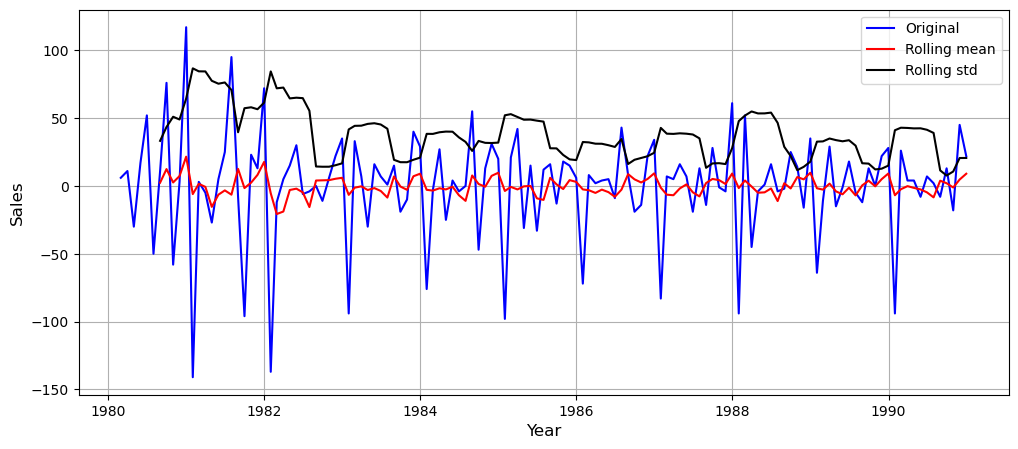

Results of Dickey-Fuller test
Test Statistic                -6.592372e+00
p-value                        7.061944e-09
#Lags Used                     1.200000e+01
Number of Observations Used    1.180000e+02
Critical value (1%)           -3.487022e+00
Critical value (5%)           -2.886363e+00
Critical value (10%)          -2.580009e+00
dtype: float64 



In [ ]:
test_stationarity(train['Rose'].diff().dropna()) #d = 1

**We see that at  α  = 0.05 the Time Series is indeed stationary.**

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

# ARIMA Model

In [ ]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3) #p=0,1,2... q=0,1,2
d= range(1,2) # d=1
pdq = list(itertools.product(p, d, q))
print('Parameter combinations for the Model...')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Parameter combinations for the Model...
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [ ]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns = ['Params', 'AIC'])
ARIMA_AIC

,Params,AIC


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
for param in pdq:
    ARIMA_model = ARIMA(train['Rose'].values, order = param).fit()
    print('ARIMA{} - AIC:{}'.format(param, ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'Params':param, 'AIC':ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1333.1546729124348
ARIMA(0, 1, 1) - AIC:1282.3098319748299
ARIMA(0, 1, 2) - AIC:1279.6715288535784
ARIMA(1, 1, 0) - AIC:1317.3503105381506
ARIMA(1, 1, 1) - AIC:1280.5742295380073
ARIMA(1, 1, 2) - AIC:1279.870723423191
ARIMA(2, 1, 0) - AIC:1298.6110341604915
ARIMA(2, 1, 1) - AIC:1281.5078621868522
ARIMA(2, 1, 2) - AIC:1281.8707222264575


In [ ]:
ARIMA_AIC.sort_values(by='AIC').head()

,Params,AIC
2,"(0, 1, 2)",1279.671529
5,"(1, 1, 2)",1279.870723
4,"(1, 1, 1)",1280.574230
7,"(2, 1, 1)",1281.507862
8,"(2, 1, 2)",1281.870722


In [ ]:
auto_ARIMA = ARIMA(train['Rose'], order=(0, 1, 2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -636.836
Date:                Sun, 14 May 2023   AIC                           1279.672
Time:                        11:43:39   BIC                           1288.297
Sample:                    01-31-1980   HQIC                          1283.176
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6970      0.072     -9.689      0.000      -0.838      -0.556
ma.L2         -0.2042      0.073     -2.794      0.005      -0.347      -0.061
sigma2       965.8407     88.305     10.938      0.0

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [ ]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [ ]:
#Model evaluation
rmse_model_ARIMA = metrics.mean_squared_error(test['Rose'], predicted_auto_ARIMA, squared = False)
print("For ARIMA (0, 1, 2), ARIMA forecast on test set, RMSE is", rmse_model_ARIMA)

For ARIMA (0, 1, 2), ARIMA forecast on test set, RMSE is 37.32666264800394


In [ ]:
results_ARIMA = pd.DataFrame({'Test RMSE':[rmse_model_ARIMA]}, index=['ARIMA (0, 1, 2)'])

results_DF = pd.concat([results_DF, results_ARIMA])
results_DF

,Test RMSE
Regression on time,15.275520
Naive Model,79.738146
Simple Average Model,53.480456
2-point trailing Moving Average,68.989714
4-point trailing Moving Average,46.423686
6-point trailing Moving Average,39.146677
9-point trailing Moving Average,34.431243
Simple Exp Smoothing (alpha = 0.987),36.816502
Simple Exp Smoothing (alpha = 0.3),47.524854
"Double Exp Smoothing (alpha = 0, beta = 0)",15.275507


# SARIMA Model

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model

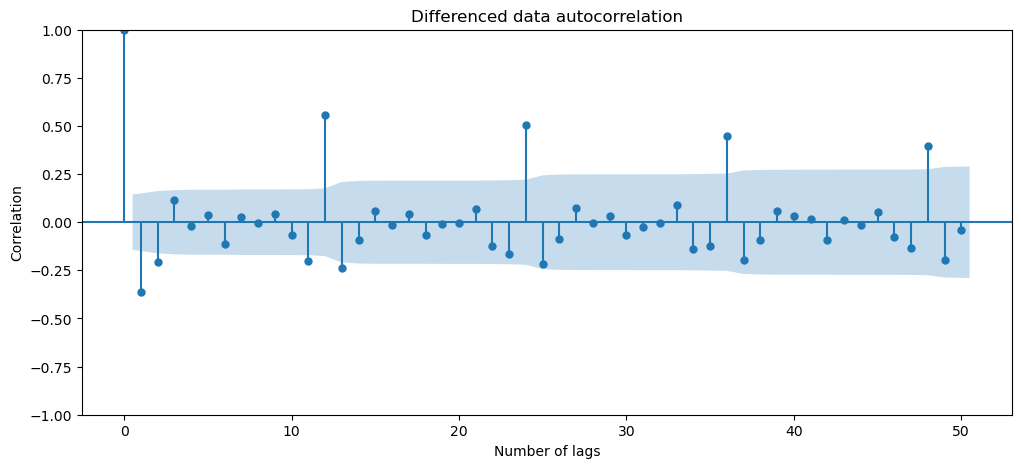

In [ ]:
plot_acf(df_rose_1['Rose'].diff().dropna(), lags = 50)
plt.xlabel('Number of lags')
plt.ylabel('Correlation')
plt.title('Differenced data autocorrelation');

We see that there can be a seasonality of 12. We will run our auto SARIMA models by setting seasonality as 12.

In [ ]:
import itertools
p = q = range(0, 3) #p,q= 0,1,2
d= range(1,2) # d=1
D = range(0,1) # D=0
P=Q = range(0,3) # P=Q=0,1,2
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [ ]:
SARIMA_AIC = pd.DataFrame(columns = ['Param', 'Seasonal', 'AIC'])
SARIMA_AIC

,Param,Seasonal,AIC


In [ ]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                                order = param,
                                                seasonal_order = param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

        results_SARIMA = SARIMA_model.fit(maxiter = 1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'Param':param, 'Seasonal':param_seasonal, 'AIC':results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.423082720726
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.4375296380884
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.0207869386636
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.6913635753511
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.8794540697584
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.5735408945759
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1263.5369097383968
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.5554825918339
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:923.6314049383819
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1095.7936324918323


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1054.7434330947315
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:918.8573483301611
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:914.5982866535802
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:915.3332430461669
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:901.1988415115034
SARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC:1251.6675430541045
SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:1083.4866975264977
SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:913.49384866177
SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:1088.8332843414526
SARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC:1045.5400933398305
SARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:904.8310913635587
SARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:913.0105912257986
SARIMA(0, 1, 2)x(2, 0, 1, 12) - AIC:914.1707545025821
SARIMA(0, 1, 2)x(2, 0, 2, 12) - AIC:887.937508567969
SARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:1308.161871082466
SARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1135.2955447585714
SARIMA(1, 1, 0)x(0, 0, 2, 12) - AIC:963.9405391257695
SARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:1124.8860786804516
SARIMA(1, 1, 0)x(1, 0, 1

In [ ]:
SARIMA_AIC.sort_values(by = 'AIC').head()

,Param,Seasonal,AIC
26,"(0, 1, 2)","(2, 0, 2, 12)",887.937509
53,"(1, 1, 2)","(2, 0, 2, 12)",889.901291
80,"(2, 1, 2)","(2, 0, 2, 12)",890.668798
69,"(2, 1, 1)","(2, 0, 0, 12)",896.518161
78,"(2, 1, 2)","(2, 0, 0, 12)",897.346444


In [ ]:
auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                       order = (0, 1, 2),
                                       seasonal_order = (2, 0, 2, 12),
                                       enforce_stationarity = False,
                                       enforce_invertibility = False)

results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -436.969
Date:                            Sun, 14 May 2023   AIC                            887.938
Time:                                    11:45:37   BIC                            906.448
Sample:                                         0   HQIC                           895.437
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8427    189.825     -0.004      0.996    -372.894     371.208
ma.L2         -0.1573     29.823   

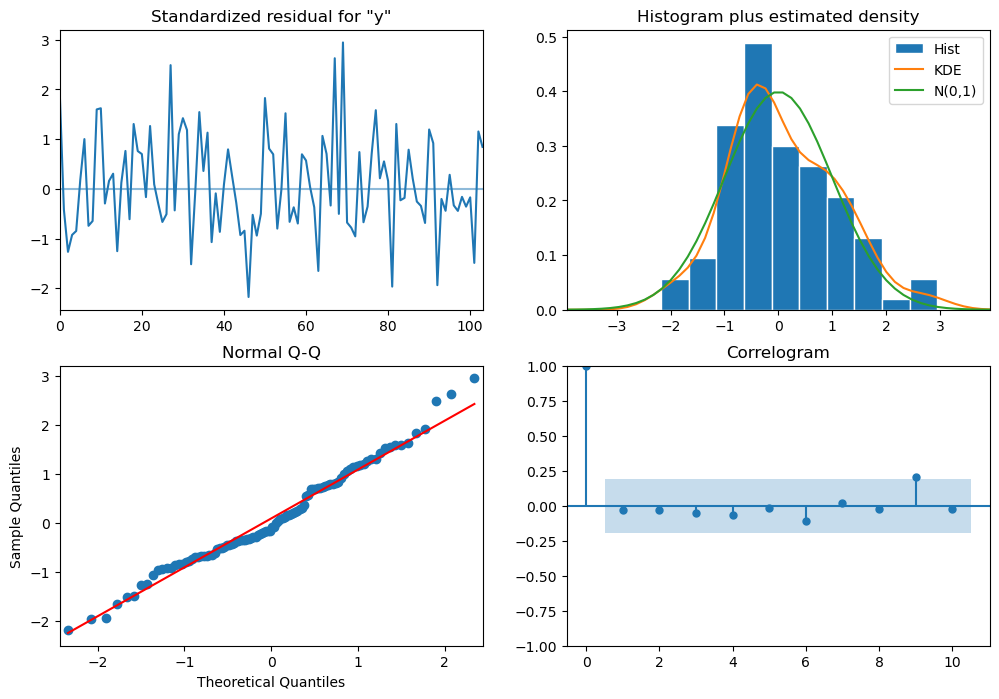

In [ ]:
results_auto_SARIMA.plot_diagnostics(figsize=(12,8))
plt.show();

In [ ]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [ ]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,62.867264,15.928501,31.647976,94.086551
1,70.541190,16.147659,38.892361,102.190020
2,77.356411,16.147656,45.707586,109.005235
3,76.208814,16.147656,44.559989,107.857638
4,72.747398,16.147656,41.098573,104.396222


In [ ]:
#Model evaluation
rmse_SARIMA = metrics.mean_squared_error(test['Rose'], predicted_auto_SARIMA.predicted_mean,squared=False)
print(rmse_SARIMA)

26.948030446603088


In [ ]:
results_SARIMA = pd.DataFrame({'Test RMSE': [rmse_SARIMA]}, index = ["SARIMA (0, 1, 2) (2, 0, 2, 12)"])

results_DF = pd.concat([results_DF, results_SARIMA])
results_DF

,Test RMSE
Regression on time,15.275520
Naive Model,79.738146
Simple Average Model,53.480456
2-point trailing Moving Average,68.989714
4-point trailing Moving Average,46.423686
6-point trailing Moving Average,39.146677
9-point trailing Moving Average,34.431243
Simple Exp Smoothing (alpha = 0.987),36.816502
Simple Exp Smoothing (alpha = 0.3),47.524854
"Double Exp Smoothing (alpha = 0, beta = 0)",15.275507


# 7. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [ ]:
results_DF.sort_values(by='Test RMSE')

,Test RMSE
"Triple Exp Smoothing (alpha = 0.088, beta = 0.0001, gamma = 0.0023)",14.297933
"Double Exp Smoothing (alpha = 0, beta = 0)",15.275507
Regression on time,15.275520
"Triple Exp Smoothing (alpha = 0.06, beta = 0.051, gamma = 0)",20.976545
"SARIMA (0, 1, 2) (2, 0, 2, 12)",26.948030
"Triple Exp Smoothing (alpha = 0.1, beta = 1, gamma = 0.2)",27.612066
9-point trailing Moving Average,34.431243
Simple Exp Smoothing (alpha = 0.987),36.816502
"Double Exp Smoothing (alpha = 0.1, beta = 0.1)",36.944359
"ARIMA (0, 1, 2)",37.326663


# 8. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

In [ ]:
full_model = ExponentialSmoothing(df_rose_1,
                                  trend='additive',
                                  seasonal='additive').fit(smoothing_level=0.0088,
                                                                 smoothing_trend=0.0001,
                                                                 smoothing_seasonal=0.0023)

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [ ]:
RMSE_full_model = metrics.mean_squared_error(df_rose_1['Rose'],full_model.fittedvalues,squared=False)

print('RMSE:',RMSE_full_model)

RMSE: 17.940643655179194


In [ ]:
# Getting the predictions for  future 12 months
prediction = full_model.forecast(steps=12)

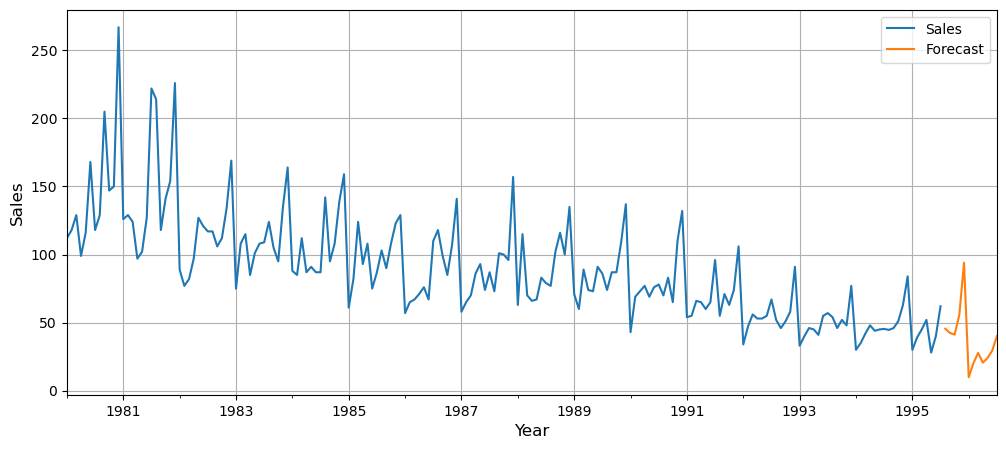

In [ ]:
df_rose_1.plot()
prediction.plot()

plt.xlabel('Year', fontsize=12)
plt.ylabel('Sales', fontsize=12)

plt.legend(['Sales', 'Forecast'])
plt.grid();

In [ ]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_df = pd.DataFrame({'lower_CI':prediction - 1.96*np.std(full_model.resid,ddof=1),
                          'prediction':prediction,
                          'upper_ci': prediction + 1.96*np.std(full_model.resid,ddof=1)})
pred_df.head()

,lower_CI,prediction,upper_ci
1995-08-31,10.279115,45.537175,80.795236
1995-09-30,7.172882,42.430942,77.689003
1995-10-31,5.907164,41.165225,76.423285
1995-11-30,20.506722,55.764783,91.022843
1995-12-31,58.773154,94.031215,129.289275


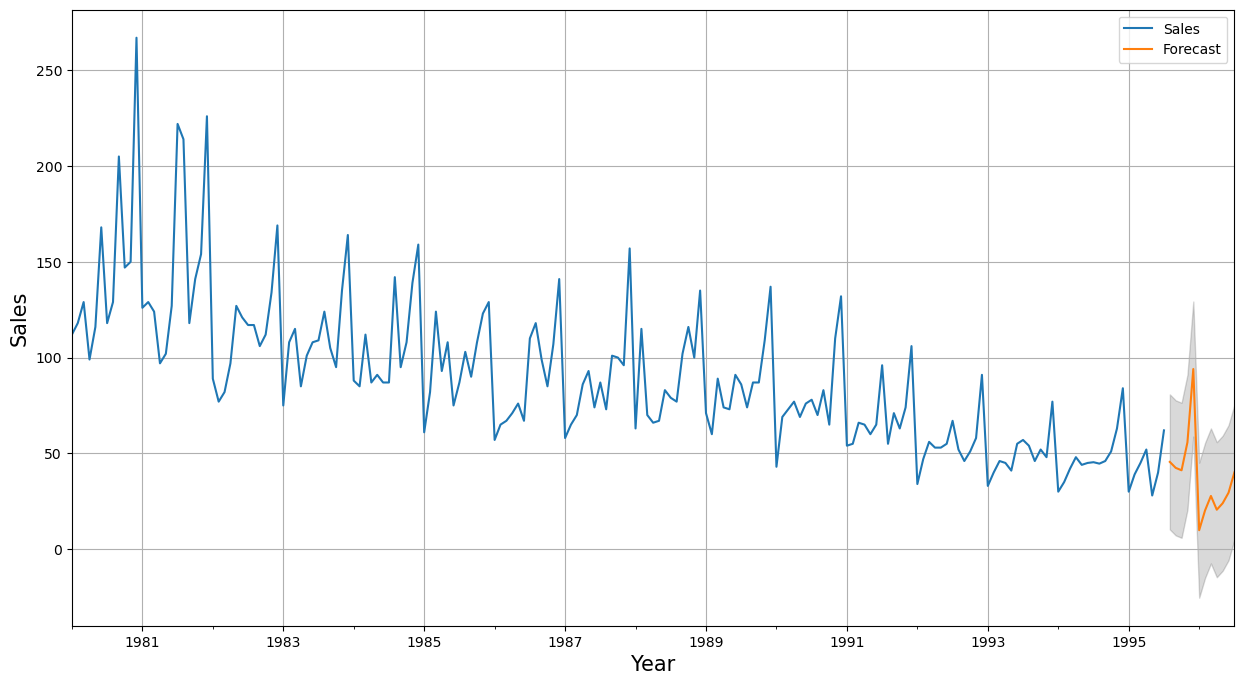

In [ ]:
# plot the forecast along with the confidence band

axis = df_rose_1.plot(label='Actual', figsize=(15,8))
pred_df['prediction'].plot(ax=axis)
axis.fill_between(pred_df.index, pred_df['lower_CI'], pred_df['upper_ci'], color='k', alpha=0.15)
axis.set_xlabel('Year', fontsize=15)
axis.set_ylabel('Sales', fontsize=15)
plt.legend(['Sales', 'Forecast'])
plt.grid()
plt.show();

# **END**